In [1]:
#Data Mining CA 2

In [2]:
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product                    # some useful functions
from tqdm import tqdm_notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import category_scatter
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import norm
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.feature_selection import RFE
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
f_name = "ElectionData.csv" #file name

def read_data(f):
    data = pd.read_csv(f) #Creating a pandas dataframe by reading the csv file
    print(data.head(5))   #Viewing first 5 rows
    return data
data = read_data(f_name)

   TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   
1            0  2019-10-06 20:10:02  Território Nacional              0   
2            0  2019-10-06 20:10:02  Território Nacional              0   
3            0  2019-10-06 20:10:02  Território Nacional              0   
4            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66  

In [4]:
def whole_summary(x):
    print(x.shape)  #dimension of the dataset
    print(x.describe()) #summary of all the columns
whole_summary(data)

(21643, 28)
        TimeElapsed  totalMandates  availableMandates   numParishes  \
count  21643.000000   21643.000000       21643.000000  21643.000000   
mean     133.146052      11.544795          11.499284    309.956013   
std       77.651193      31.314567          31.738783    659.055911   
min        0.000000       0.000000           0.000000     54.000000   
25%       65.000000       1.000000           0.000000     75.000000   
50%      135.000000       4.000000           3.000000    147.000000   
75%      200.000000       9.000000           9.000000    242.000000   
max      265.000000     226.000000         226.000000   3092.000000   

       numParishesApproved     blankVotes  blankVotesPercentage     nullVotes  \
count         21643.000000   21643.000000          21643.000000  21643.000000   
mean            261.090237    8875.066673              2.621629   6148.068752   
std             583.377428   21484.874088              0.795289  14735.469269   
min               3.0000

In [5]:
print(data.columns)
data = data.drop(['TimeElapsed', 'time','totalMandates','Mandates'],axis=1)
data.head(5)

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')


territoryName  availableMandates  numParishes  numParishesApproved  \
0  Território Nacional                226         3092                 1081   
1  Território Nacional                226         3092                 1081   
2  Território Nacional                226         3092                 1081   
3  Território Nacional                226         3092                 1081   
4  Território Nacional                226         3092                 1081   

   blankVotes  blankVotesPercentage  nullVotes  nullVotesPercentage  \
0        9652                   2.5       8874                  2.3   
1        9652                   2.5       8874                  2.3   
2        9652                   2.5       8874                  2.3   
3        9652                   2.5       8874                  2.3   
4        9652                   2.5       8874                  2.3   

   votersPercentage  subscribedVoters  ...  pre.nullVotesPercentage  \
0             51.36            752529  ...                     1.91   
1             51.36            752529  ...                     1.91   
2             51.36            752529  ...                     1.91   
3             51.36            752529  ...                     1.91   
4             51.36            752529  ...                     1.91   

   pre.votersPercentage  pre.subscribedVoters  pre.totalVoters    Party  \
0                 52.66                813743           428546       PS   
1                 52.66                813743           428546  PPD/PSD   
2                 52.66                813743           428546     B.E.   
3                 52.66                813743           428546   CDS-PP   
4                 52.66                813743           428546  PCP-PEV   

   Percentage  validVotesPercentage   Votes Hondt  FinalMandates  
0       38.29                 40.22  147993    94            106  
1       33.28                 34.95  128624    81             77  
2        6.81                  7.15   26307    16             19  
3        4.90                  5.14   18923    12              5  
4        4.59                  4.83   17757    11             12  

[5 rows x 24 columns]

In [6]:
converter = LabelEncoder()
data['territoryName'] = converter.fit_transform(data['territoryName'].astype(str))
print(data.head())
print(data.info())

   territoryName  availableMandates  numParishes  numParishesApproved  \
0             16                226         3092                 1081   
1             16                226         3092                 1081   
2             16                226         3092                 1081   
3             16                226         3092                 1081   
4             16                226         3092                 1081   

   blankVotes  blankVotesPercentage  nullVotes  nullVotesPercentage  \
0        9652                   2.5       8874                  2.3   
1        9652                   2.5       8874                  2.3   
2        9652                   2.5       8874                  2.3   
3        9652                   2.5       8874                  2.3   
4        9652                   2.5       8874                  2.3   

   votersPercentage  subscribedVoters  ...  pre.nullVotesPercentage  \
0             51.36            752529  ...                     

In [7]:
data['Party'] = converter.fit_transform(data['Party'].astype(str))
print(data.head())
print(data.info())

   territoryName  availableMandates  numParishes  numParishesApproved  \
0             16                226         3092                 1081   
1             16                226         3092                 1081   
2             16                226         3092                 1081   
3             16                226         3092                 1081   
4             16                226         3092                 1081   

   blankVotes  blankVotesPercentage  nullVotes  nullVotesPercentage  \
0        9652                   2.5       8874                  2.3   
1        9652                   2.5       8874                  2.3   
2        9652                   2.5       8874                  2.3   
3        9652                   2.5       8874                  2.3   
4        9652                   2.5       8874                  2.3   

   votersPercentage  subscribedVoters  ...  pre.nullVotesPercentage  \
0             51.36            752529  ...                     

In [8]:
data.isnull().any()

territoryName               False
availableMandates           False
numParishes                 False
numParishesApproved         False
blankVotes                  False
blankVotesPercentage        False
nullVotes                   False
nullVotesPercentage         False
votersPercentage            False
subscribedVoters            False
totalVoters                 False
pre.blankVotes              False
pre.blankVotesPercentage    False
pre.nullVotes               False
pre.nullVotesPercentage     False
pre.votersPercentage        False
pre.subscribedVoters        False
pre.totalVoters             False
Party                       False
Percentage                  False
validVotesPercentage        False
Votes                       False
Hondt                       False
FinalMandates               False
dtype: bool

In [9]:
Y = data.filter(['Party'],axis=1)
X = data.drop(['Party'],axis=1)
print(Y.head())
print(X.head())

   Party
0     17
1     15
2      1
3      2
4     11
   territoryName  availableMandates  numParishes  numParishesApproved  \
0             16                226         3092                 1081   
1             16                226         3092                 1081   
2             16                226         3092                 1081   
3             16                226         3092                 1081   
4             16                226         3092                 1081   

   blankVotes  blankVotesPercentage  nullVotes  nullVotesPercentage  \
0        9652                   2.5       8874                  2.3   
1        9652                   2.5       8874                  2.3   
2        9652                   2.5       8874                  2.3   
3        9652                   2.5       8874                  2.3   
4        9652                   2.5       8874                  2.3   

   votersPercentage  subscribedVoters  ...  pre.nullVotes  \
0             51.36

In [10]:
whole_summary(data['Party'])

(21643,)
count    21643.000000
mean        10.096521
std          6.129654
min          0.000000
25%          4.000000
50%         11.000000
75%         15.000000
max         20.000000
Name: Party, dtype: float64


Party
0     1127
1     1127
2     1127
3     1127
4     1127
5      486
6     1127
7      425
8     1019
9      972
10    1127
11    1127
12    1127
13    1127
14    1127
15    1127
16    1073
17    1127
18    1019
19     972
20    1026
dtype: int64


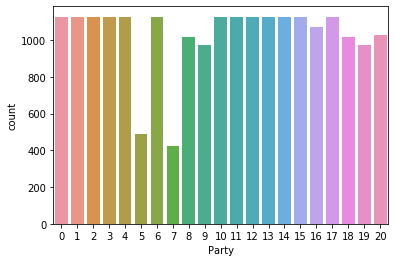

In [11]:
print(data.groupby('Party').size())
sns.countplot(data['Party'],label="Count")
plt.show()

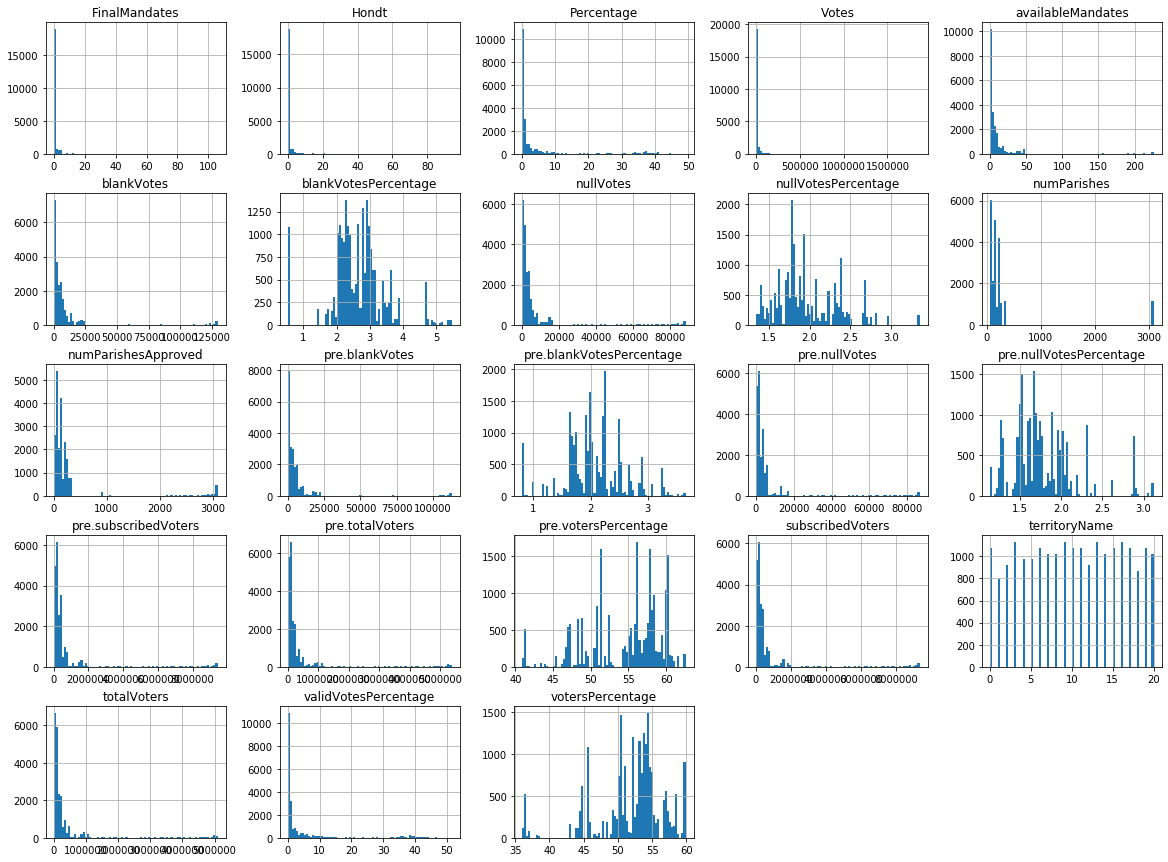

In [12]:
X.hist(bins=80,figsize=(20,15))
plt.show()

['territoryName' 'availableMandates' 'numParishes' 'numParishesApproved'
 'blankVotes' 'blankVotesPercentage' 'nullVotes' 'nullVotesPercentage'
 'votersPercentage' 'subscribedVoters' 'totalVoters' 'pre.blankVotes'
 'pre.blankVotesPercentage' 'pre.nullVotes' 'pre.nullVotesPercentage'
 'pre.votersPercentage' 'pre.subscribedVoters' 'pre.totalVoters'
 'Percentage' 'validVotesPercentage' 'Votes' 'Hondt' 'FinalMandates']


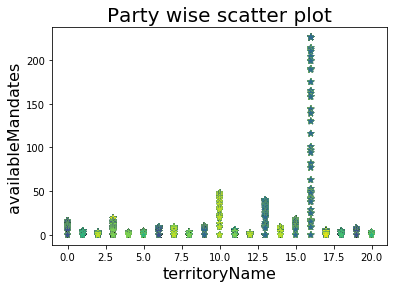

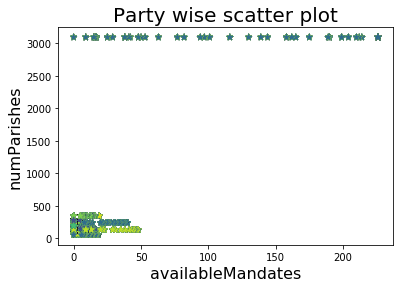

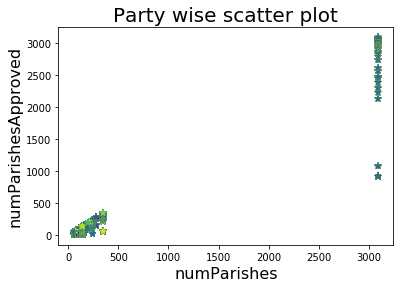

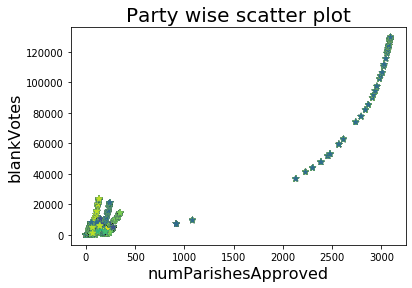

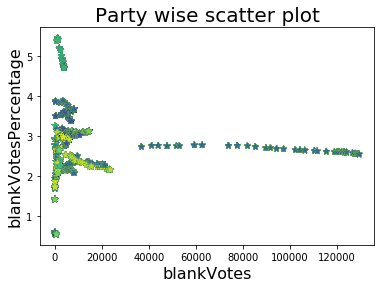

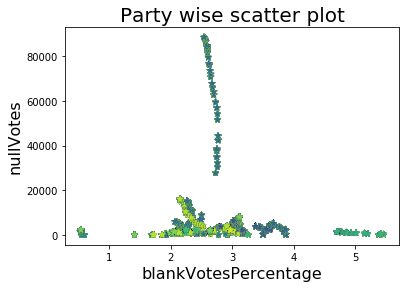

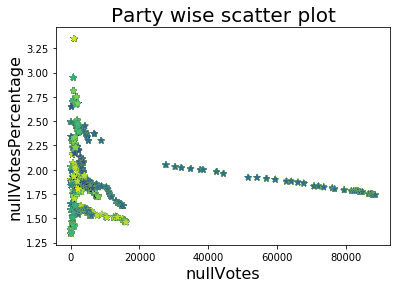

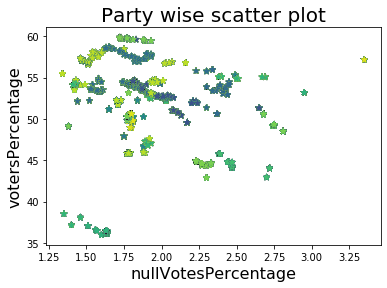

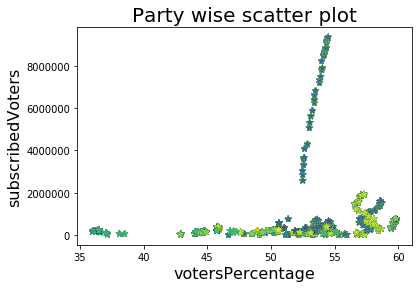

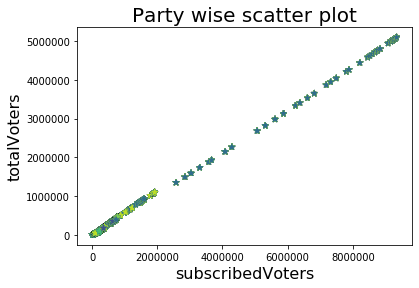

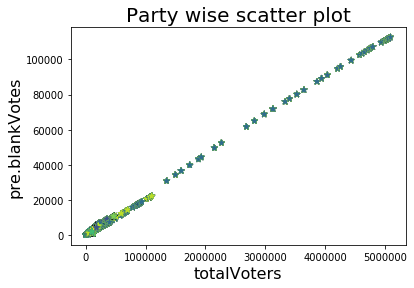

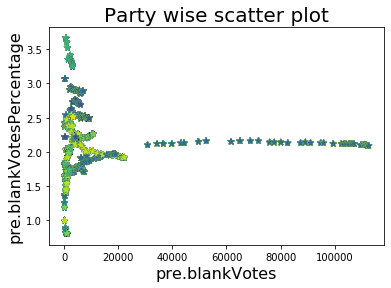

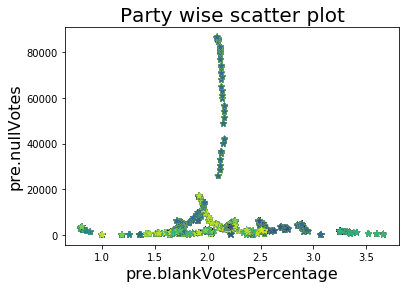

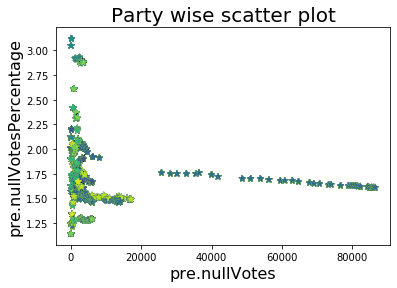

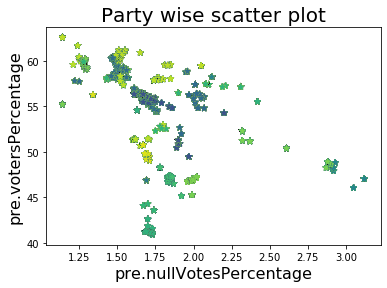

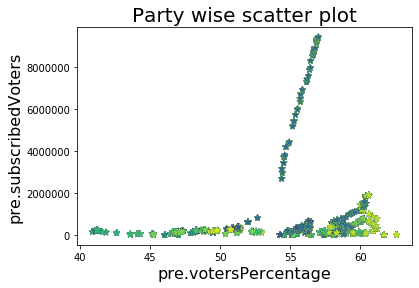

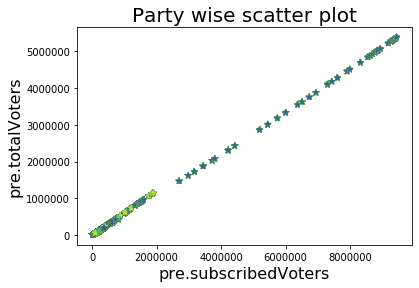

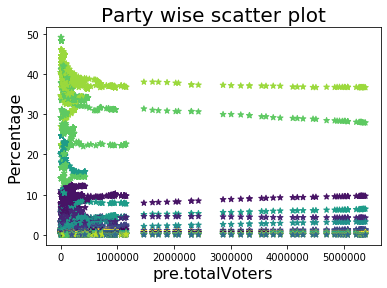

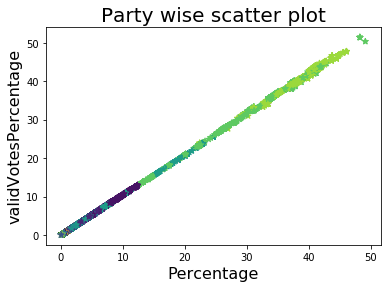

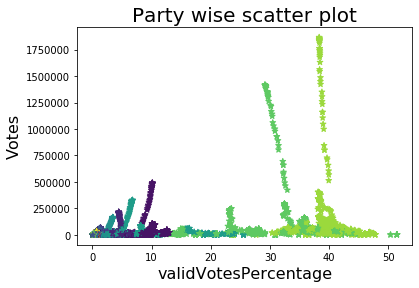

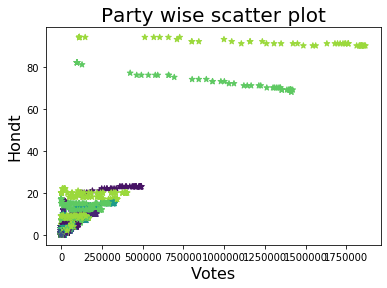

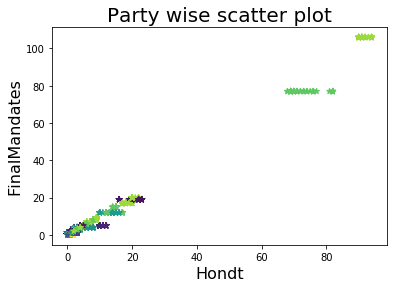

In [13]:
X_col = np.asarray(X.columns)
print(X_col)
Y_col = np.asarray(Y.columns)
z = 0
while (z < (len(X_col)-1)):
    plt.scatter(data[X_col[z]], data[X_col[z+1]], marker='*', c=data[Y_col[0]],label=Y_col[0])
    plt.xlabel(X_col[z], fontsize=16)
    plt.ylabel(X_col[z+1], fontsize=16)
    plt.title('Party wise scatter plot',fontsize=20)
    plt.show()
    z = z+1

In [14]:
scaler = StandardScaler()
# Fit your data on the scaler object
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_col)
X

territoryName  availableMandates  numParishes  numParishesApproved  \
0           0.982968           6.758472     4.221354             1.405486   
1           0.982968           6.758472     4.221354             1.405486   
2           0.982968           6.758472     4.221354             1.405486   
3           0.982968           6.758472     4.221354             1.405486   
4           0.982968           6.758472     4.221354             1.405486   
...              ...                ...          ...                  ...   
21638       1.484214          -0.362319    -0.050006             0.027272   
21639       1.484214          -0.362319    -0.050006             0.027272   
21640       1.484214          -0.362319    -0.050006             0.027272   
21641       1.484214          -0.362319    -0.050006             0.027272   
21642       1.484214          -0.362319    -0.050006             0.027272   

       blankVotes  blankVotesPercentage  nullVotes  nullVotesPercentage  \
0        0.036163             -0.152941   0.184995             0.902163   
1        0.036163             -0.152941   0.184995             0.902163   
2        0.036163             -0.152941   0.184995             0.902163   
3        0.036163             -0.152941   0.184995             0.902163   
4        0.036163             -0.152941   0.184995             0.902163   
...           ...                   ...        ...                  ...   
21638   -0.180599              0.236864  -0.166138             0.315874   
21639   -0.180599              0.236864  -0.166138             0.315874   
21640   -0.180599              0.236864  -0.166138             0.315874   
21641   -0.180599              0.236864  -0.166138             0.315874   
21642   -0.180599              0.236864  -0.166138             0.315874   

       votersPercentage  subscribedVoters  ...  pre.nullVotes  \
0             -0.128489          0.081932  ...       0.158501   
1             -0.128489          0.081932  ...       0.158501   
2             -0.128489          0.081932  ...       0.158501   
3             -0.128489          0.081932  ...       0.158501   
4             -0.128489          0.081932  ...       0.158501   
...                 ...               ...  ...            ...   
21638         -0.194411         -0.183196  ...      -0.160345   
21639         -0.194411         -0.183196  ...      -0.160345   
21640         -0.194411         -0.183196  ...      -0.160345   
21641         -0.194411         -0.183196  ...      -0.160345   
21642         -0.194411         -0.183196  ...      -0.160345   

       pre.nullVotesPercentage  pre.votersPercentage  pre.subscribedVoters  \
0                     0.340951             -0.380551              0.113892   
1                     0.340951             -0.380551              0.113892   
2                     0.340951             -0.380551              0.113892   
3                     0.340951             -0.380551              0.113892   
4                     0.340951             -0.380551              0.113892   
...                        ...                   ...                   ...   
21638                 0.315230             -0.658506             -0.172185   
21639                 0.315230             -0.658506             -0.172185   
21640                 0.315230             -0.658506             -0.172185   
21641                 0.315230             -0.658506             -0.172185   
21642                 0.315230             -0.658506             -0.172185   

       pre.totalVoters  Percentage  validVotesPercentage     Votes      Hondt  \
0             0.078796    3.210250              3.217832  1.419284  14.757327   
1             0.078796    2.727578              2.733495  1.211248  12.691673   
2             0.078796    0.177415              0.178549  0.112293   2.363404   
3             0.078796   -0.006598             -0.006179  0.032984   1.727818   
4             0.078796   -0.036464             -0.034669  

In [15]:
def feature_sel(model,X,y,m):
    model.fit(X,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(m).plot(kind='barh')
    plt.show()

[0.01473786 0.00750407 0.01346289 0.01089882 0.00804989 0.01134256
 0.00764967 0.01119973 0.01078411 0.00767662 0.00731508 0.00807037
 0.01163583 0.00794877 0.01130279 0.01210743 0.00720238 0.00718713
 0.27756793 0.27771553 0.22772343 0.01866957 0.02224757]


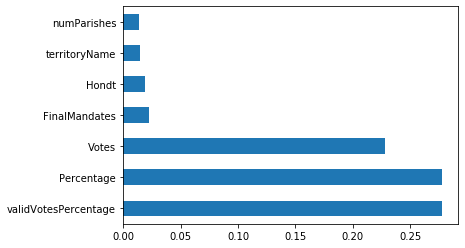

In [16]:
model = ExtraTreesClassifier()
feature_sel(model,X,Y,7)    #Selecting best 3 features.

In [17]:
#correlation matrix

corrmat = data.corr()
hc = corrmat[abs(corrmat) > 0.60]
hc.fillna('x')




territoryName availableMandates numParishes  \
territoryName                        1                 x           x   
availableMandates                    x                 1    0.745472   
numParishes                          x          0.745472           1   
numParishesApproved                  x                 x    0.954092   
blankVotes                           x                 x    0.861279   
blankVotesPercentage                 x                 x           x   
nullVotes                            x                 x     0.87024   
nullVotesPercentage                  x                 x           x   
votersPercentage                     x                 x           x   
subscribedVoters                     x                 x    0.856855   
totalVoters                          x                 x    0.850881   
pre.blankVotes                       x                 x    0.856779   
pre.blankVotesPercentage             x                 x           x   
pre.nullVotes                        x                 x    0.864837   
pre.nullVotesPercentage              x                 x           x   
pre.votersPercentage                 x                 x           x   
pre.subscribedVoters                 x                 x    0.860782   
pre.totalVoters                      x                 x    0.853779   
Party                                x                 x           x   
Percentage                           x                 x           x   
validVotesPercentage                 x                 x           x   
Votes                                x                 x           x   
Hondt                                x                 x           x   
FinalMandates                        x                 x           x   

                         numParishesApproved blankVotes blankVotesPercentage  \
territoryName                              x          x                    x   
availableMandates                          x          x                    x   
numParishes                         0.954092   0.861279                    x   
numParishesApproved                        1   0.951265                    x   
blankVotes                          0.951265          1                    x   
blankVotesPercentage                       x          x                    1   
nullVotes                           0.956142   0.998781                    x   
nullVotesPercentage                        x          x                    x   
votersPercentage                           x          x                    x   
subscribedVoters                    0.946191   0.998297                    x   
totalVoters                         0.940941   0.997951                    x   
pre.blankVotes                       0.94719   0.999657                    x   
pre.blankVotesPercentage                   x          x             0.959142   
pre.nullVotes                       0.951899    0.99749                    x   
pre.nullVotesPercentage                    x          x                    x   
pre.votersPercentage                       x          x                    x   
pre.subscribedVoters                 0.94911   0.998487                    x   
pre.totalVoters                     0.943147   0.998178                    x   
Party                                      x          x                    x   
Percentage                                 x          x                    x   
validVotesPercentage                       x          x                    x   
Votes                                      x          x                    x   
Hondt                                      x          x                    x   
FinalMandates                              x          x                    x   

                         nullVotes nullVotesPercentage votersPercentage  \
territoryName                    x                   x                x   
availableMandates                x                   x                x  

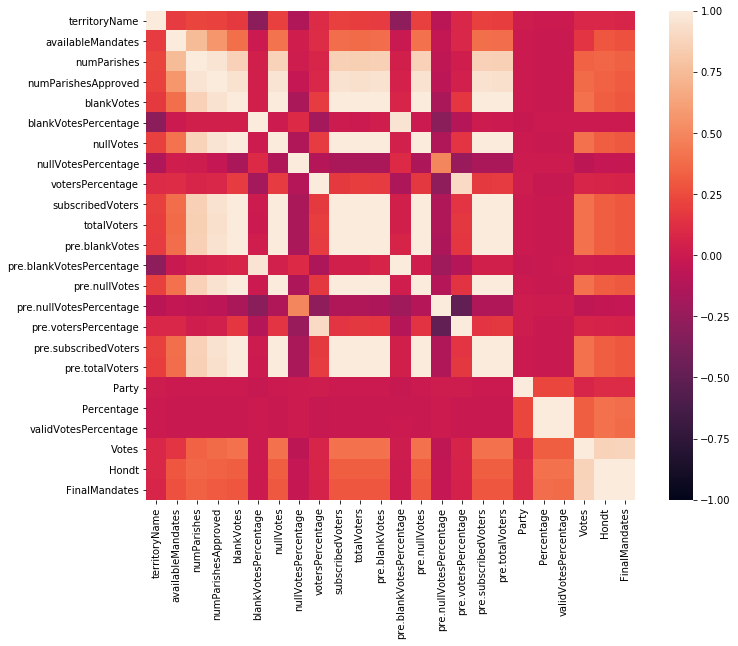

In [18]:
def corr(x):
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(x, vmax=1,vmin=-1, square=True);

corr(corrmat)

   Percentage  validVotesPercentage     Votes
0    3.210250              3.217832  1.419284
1    2.727578              2.733495  1.211248
2    0.177415              0.178549  0.112293
3   -0.006598             -0.006179  0.032984
4   -0.036464             -0.034669  0.020460


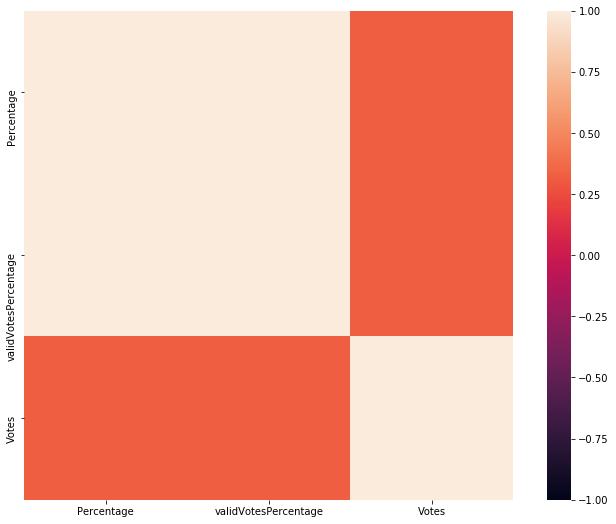

In [19]:
X_new = X.filter(['Percentage','validVotesPercentage','Votes'],axis=1)
print(X_new.head())
corr(X_new.corr())

   Percentage     Votes
0    3.210250  1.419284
1    2.727578  1.211248
2    0.177415  0.112293
3   -0.006598  0.032984
4   -0.036464  0.020460


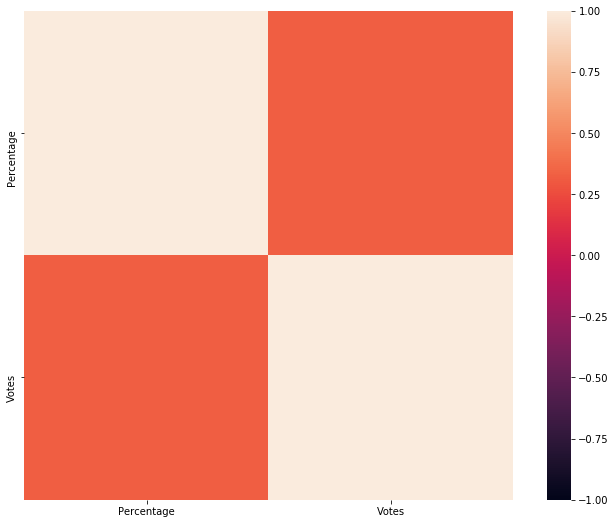

In [20]:
X_new = X_new.drop(['validVotesPercentage'],axis=1)
print(X_new.head())
corr(X_new.corr())

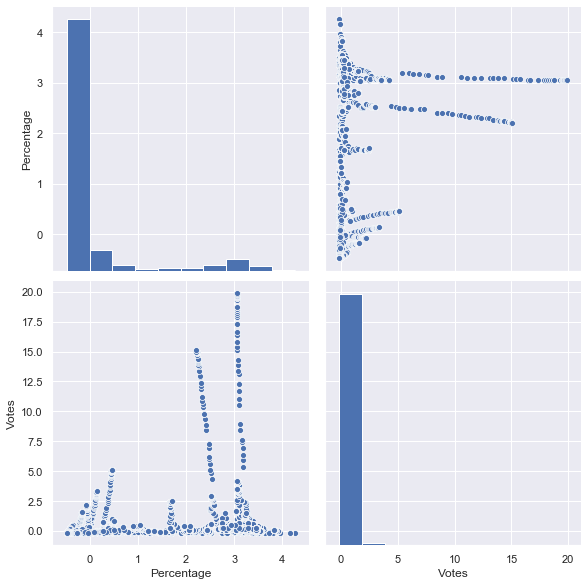

In [21]:
#scatterplot
sns.set()
sns.pairplot(X_new, height = 4)
plt.show()

In [22]:
def confus_mat(y,x):
    matrix = confusion_matrix(y, x)
    # Create pandas dataframe
    dataframe = pd.DataFrame(matrix)
    # Create heatmap
    sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()

In [23]:
def classifier(X_train, X_test, y_train, y_test):
    
    # Decison Tree Classifier
    clf = DecisionTreeClassifier().fit(X_train, y_train)
    pred = clf.predict(X_test)
    confus_mat(y_test,pred)
    print('Accuracy score : ',round(accuracy_score(pred, y_test)*100,2),"%")
    
    # KNN Classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    confus_mat(y_test,pred)
    print('Accuracy score : ',round(accuracy_score(pred, y_test)*100,2),"%")
    
    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    confus_mat(y_test,pred)
    print('Accuracy score : ',round(accuracy_score(pred, y_test)*100,2),"%")
    
    # Gaussian Naive Bayes Classifier
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    pred = gnb.predict(X_test)
    confus_mat(y_test,pred)
    print('Accuracy score : ',round(accuracy_score(pred, y_test)*100,2),"%")
    
    
    # Support Vector Classifier
    svm = SVC()
    svm.fit(X_train, y_train)
    pred = svm.predict(X_test)
    confus_mat(y_test,pred)
    print('Accuracy score : ',round(accuracy_score(pred, y_test)*100,2),"%")
    return clf
    

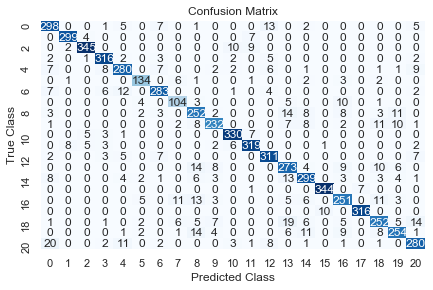

Accuracy score :  88.9 %


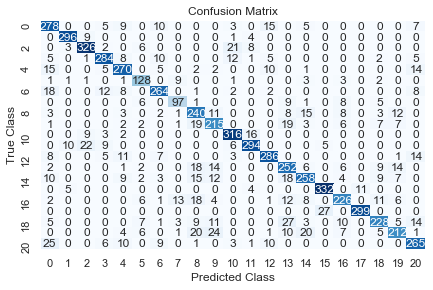

Accuracy score :  82.64 %


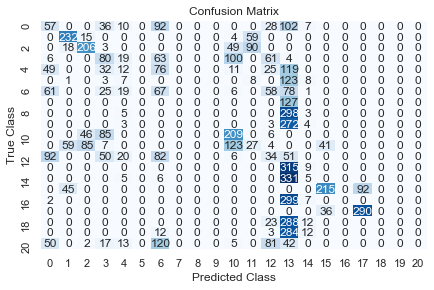

Accuracy score :  26.94 %


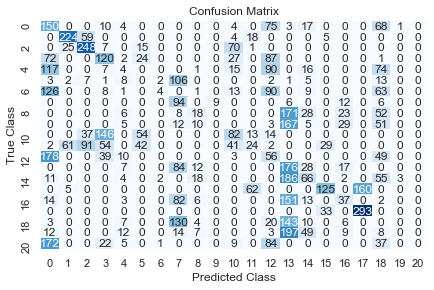

Accuracy score :  26.51 %


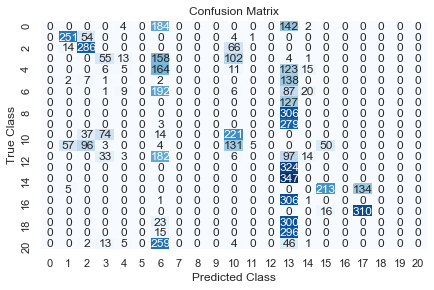

Accuracy score :  28.68 %


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3,random_state = 420)
dtree = classifier(X_train, X_test, y_train, y_test)

# Decision Tree graph

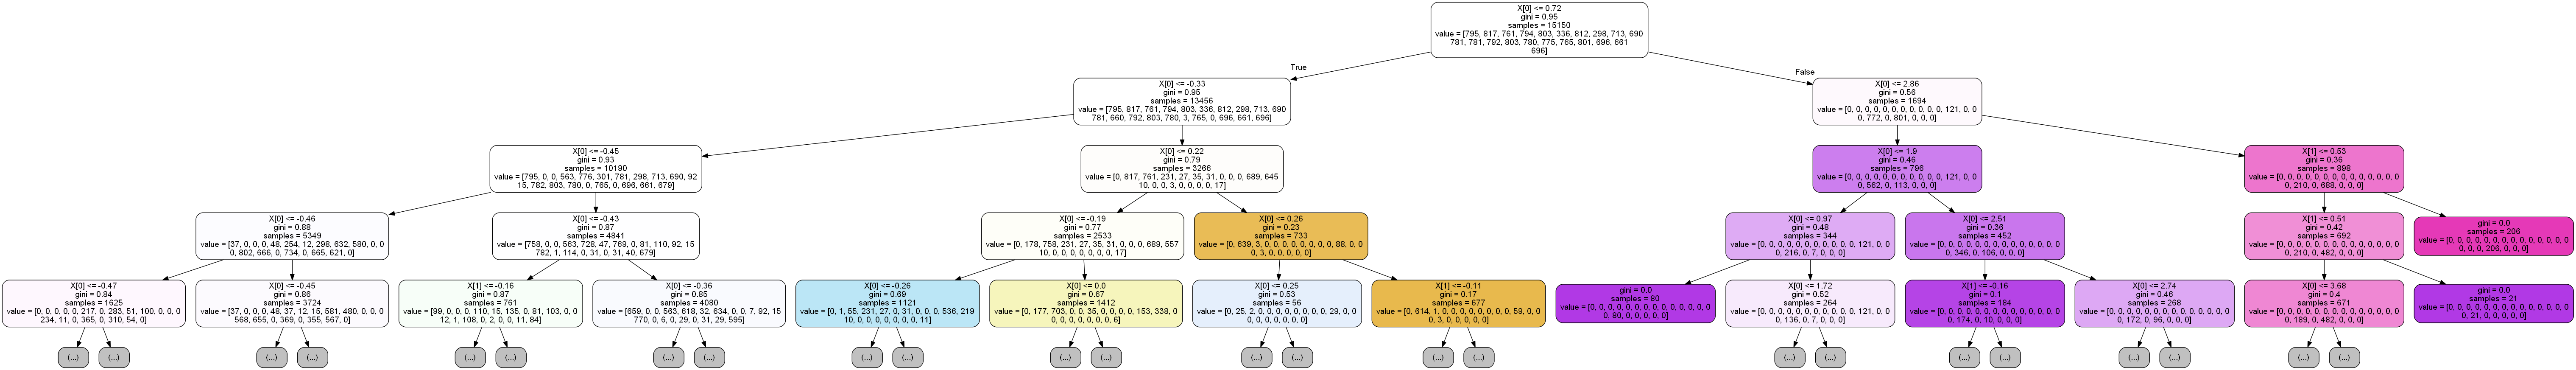

In [25]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded = True, proportion = False, 
                precision = 2,max_depth=4)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=5000, height=5000)

In [26]:
pca = PCA(n_components = 2)
pca.fit(X_new)
X_pca = pca.transform(X_new)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.66385309 0.33614691]
Total variance explained by the n_components:  1.0


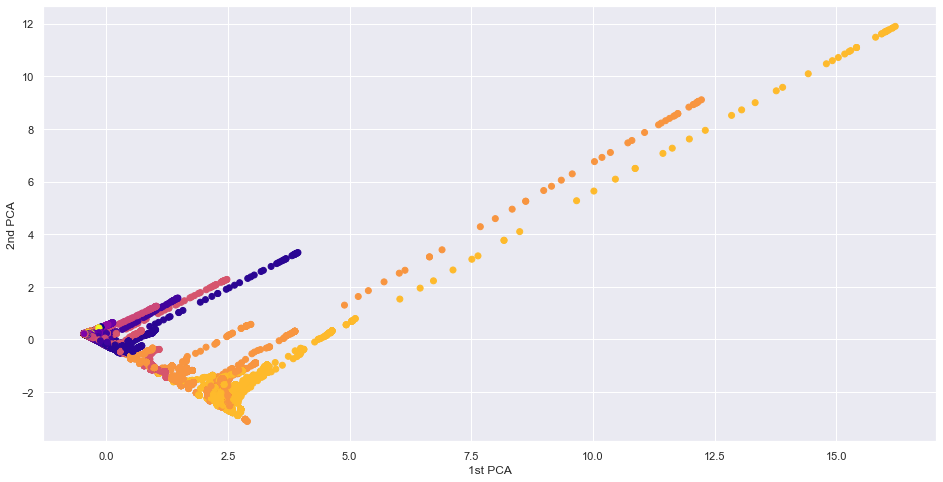

In [27]:
pca = pd.DataFrame({'PCA_1': X_pca[:, 0], 'PCA_2': X_pca[:, 1]})
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(pca['PCA_1'], pca['PCA_2'],c=Y['Party'], cmap='plasma')
ax.set_xlabel('1st PCA')
ax.set_ylabel('2nd PCA')
plt.show()

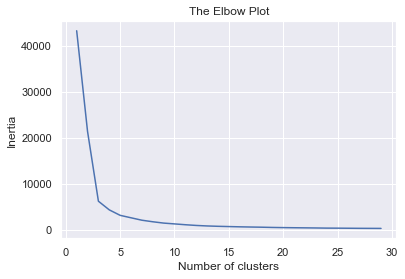

In [28]:
inertia = []
for i in range(1,30):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_new)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 30), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

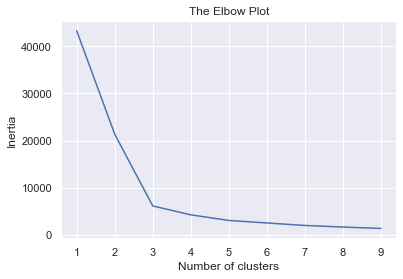

In [29]:
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_new)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Cluster Centers: 
 [[-0.320307   -0.11613646]
 [ 2.79054941  0.51627857]
 [ 2.68774013 14.83606515]]


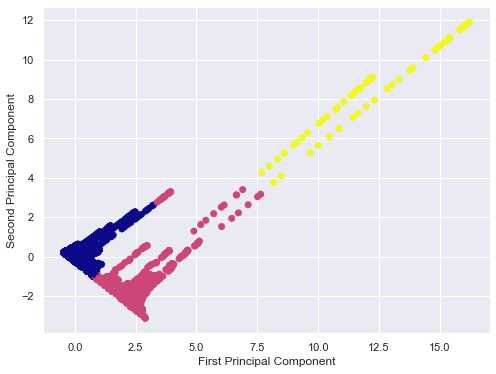

In [30]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_new)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Time series

# Time series is a series of data points indexed (or listed or graphed) in time order.

In [31]:
from dateutil.parser import parse 
import datetime
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
data = pd.read_csv(f_name)
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

TZ = data.filter(['time','Votes'],axis=1)
print(TZ.head())

TZ['date'] = pd.to_datetime(TZ['time'])
TZ = TZ.set_index('date')
TZ.drop(['time'], axis=1, inplace=True)
print(TZ.head())

   TimeElapsed                 time        territoryName  totalMandates  \
0            0  2019-10-06 20:10:02  Território Nacional              0   
1            0  2019-10-06 20:10:02  Território Nacional              0   
2            0  2019-10-06 20:10:02  Território Nacional              0   
3            0  2019-10-06 20:10:02  Território Nacional              0   
4            0  2019-10-06 20:10:02  Território Nacional              0   

   availableMandates  numParishes  numParishesApproved  blankVotes  \
0                226         3092                 1081        9652   
1                226         3092                 1081        9652   
2                226         3092                 1081        9652   
3                226         3092                 1081        9652   
4                226         3092                 1081        9652   

   blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                   2.5       8874  ...                 52.66  

(21643, 28)
(21643, 1)


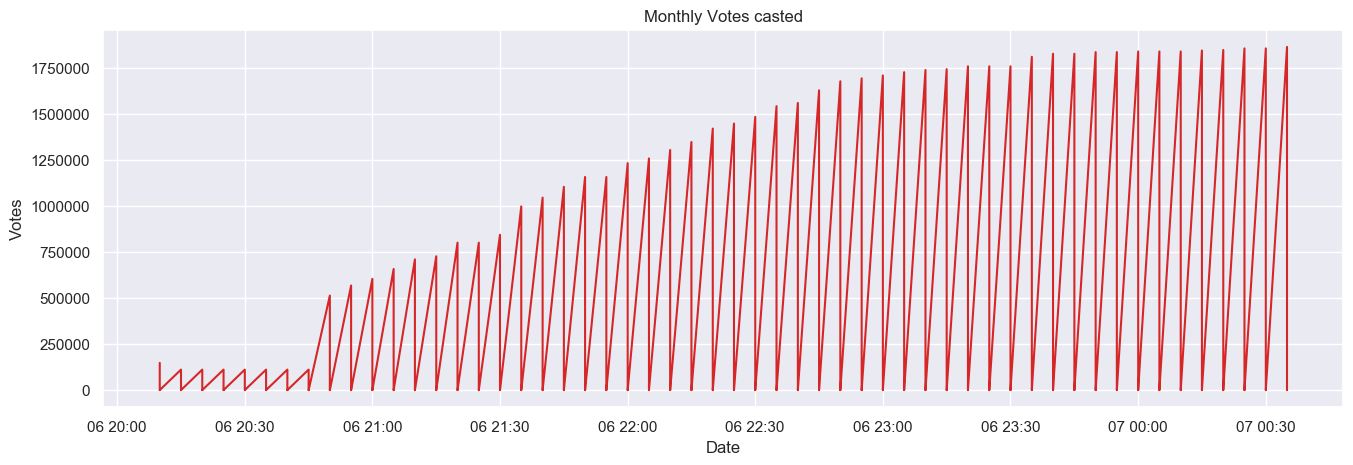

In [32]:
print(data.shape)
print(TZ.shape)
def plot_TZ(TZ, x, y, title="", xlabel='Date', ylabel='Votes', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_TZ(TZ, x=TZ.index, y=TZ.Votes, title='Monthly Votes casted') 

In [33]:
TZ['2019']

Votes
date                       
2019-10-06 20:10:02  147993
2019-10-06 20:10:02  128624
2019-10-06 20:10:02   26307
2019-10-06 20:10:02   18923
2019-10-06 20:10:02   17757
...                     ...
2019-10-07 00:35:01     332
2019-10-07 00:35:01     326
2019-10-07 00:35:01     256
2019-10-07 00:35:01     239
2019-10-07 00:35:01     118

[21643 rows x 1 columns]

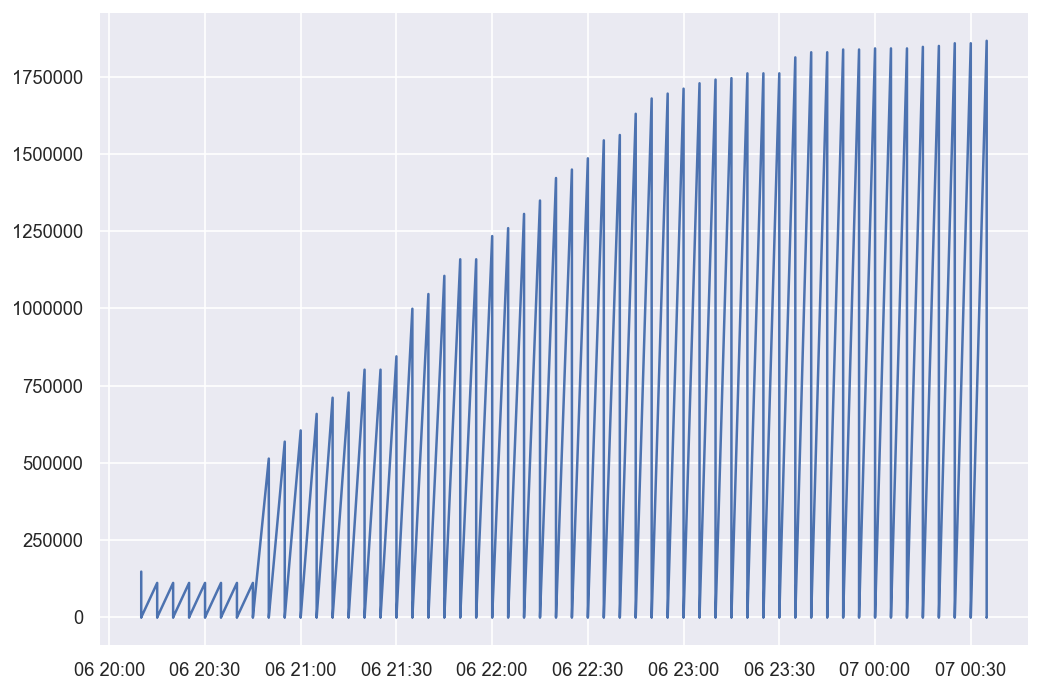

In [34]:
plt.plot(TZ)

In [35]:
TZ.index

DatetimeIndex(['2019-10-06 20:10:02', '2019-10-06 20:10:02',
               '2019-10-06 20:10:02', '2019-10-06 20:10:02',
               '2019-10-06 20:10:02', '2019-10-06 20:10:02',
               '2019-10-06 20:10:02', '2019-10-06 20:10:02',
               '2019-10-06 20:10:02', '2019-10-06 20:10:02',
               ...
               '2019-10-07 00:35:01', '2019-10-07 00:35:01',
               '2019-10-07 00:35:01', '2019-10-07 00:35:01',
               '2019-10-07 00:35:01', '2019-10-07 00:35:01',
               '2019-10-07 00:35:01', '2019-10-07 00:35:01',
               '2019-10-07 00:35:01', '2019-10-07 00:35:01'],
              dtype='datetime64[ns]', name='date', length=21643, freq=None)

In [36]:
# Add columns with year, month, and weekday name
TZ['Month'] = TZ.index.month
# Display a random sampling of 5 rows
TZ.sample(5, random_state=87)

Votes  Month
date                             
2019-10-07 00:10:02   3928     10
2019-10-07 00:35:01    209     10
2019-10-07 00:10:02   1401     10
2019-10-06 23:00:01  10188     10
2019-10-06 21:40:02   1157     10

In [37]:
avg = np.average(TZ[-24:])
print(avg)

3539.5416666666665


In [38]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

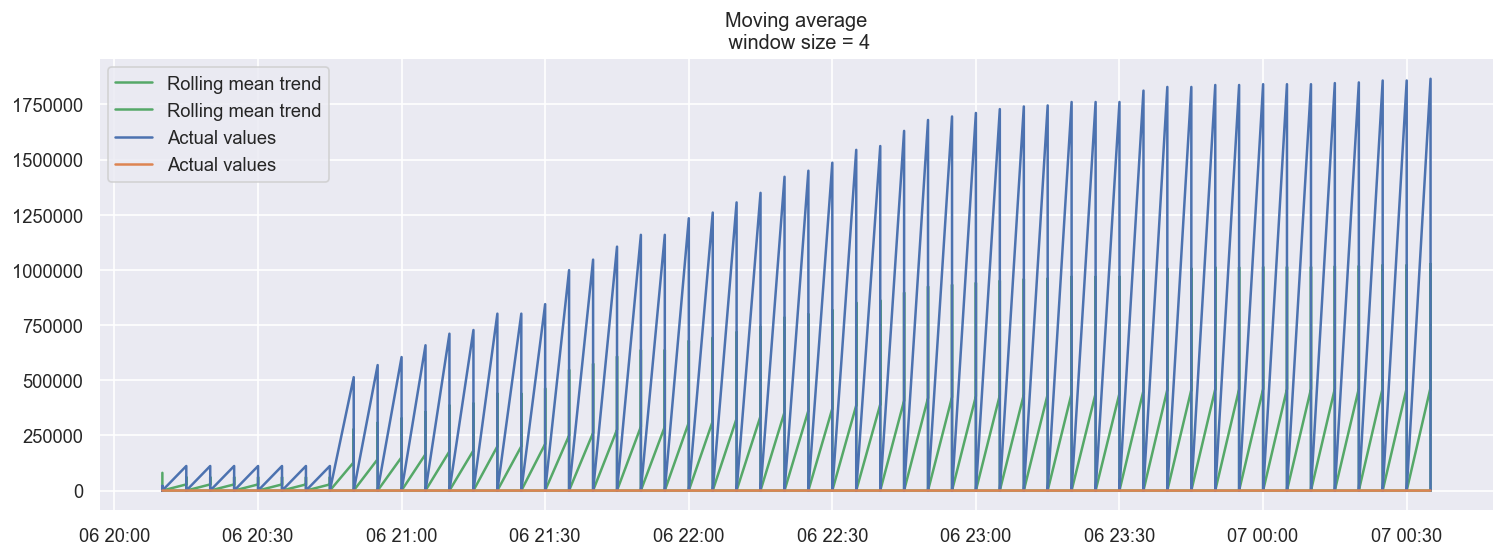

In [39]:
plotMovingAverage(TZ, 4) 

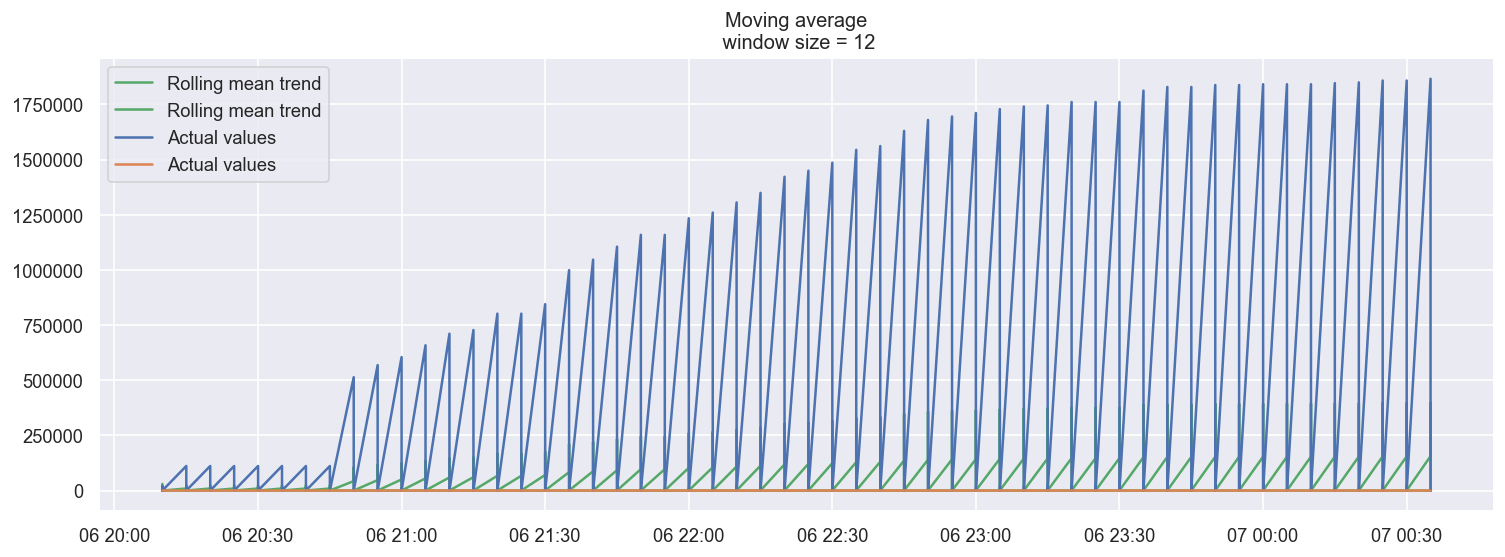

In [40]:
plotMovingAverage(TZ, 12) 

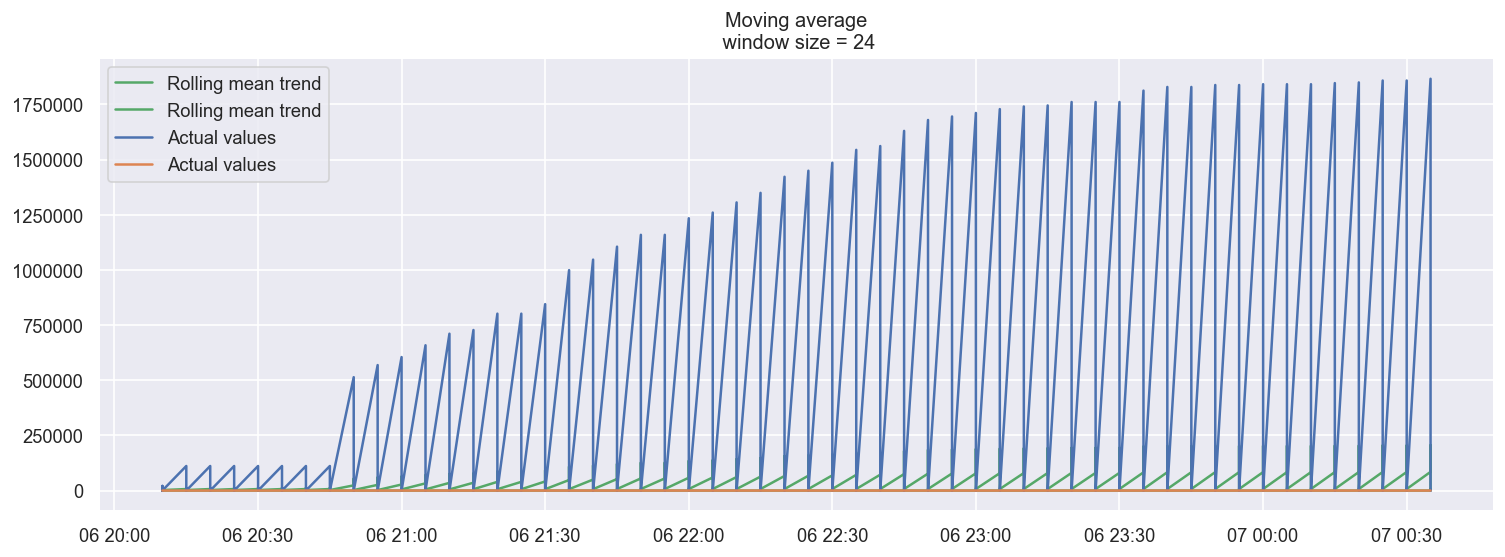

In [41]:
plotMovingAverage(TZ, 24)

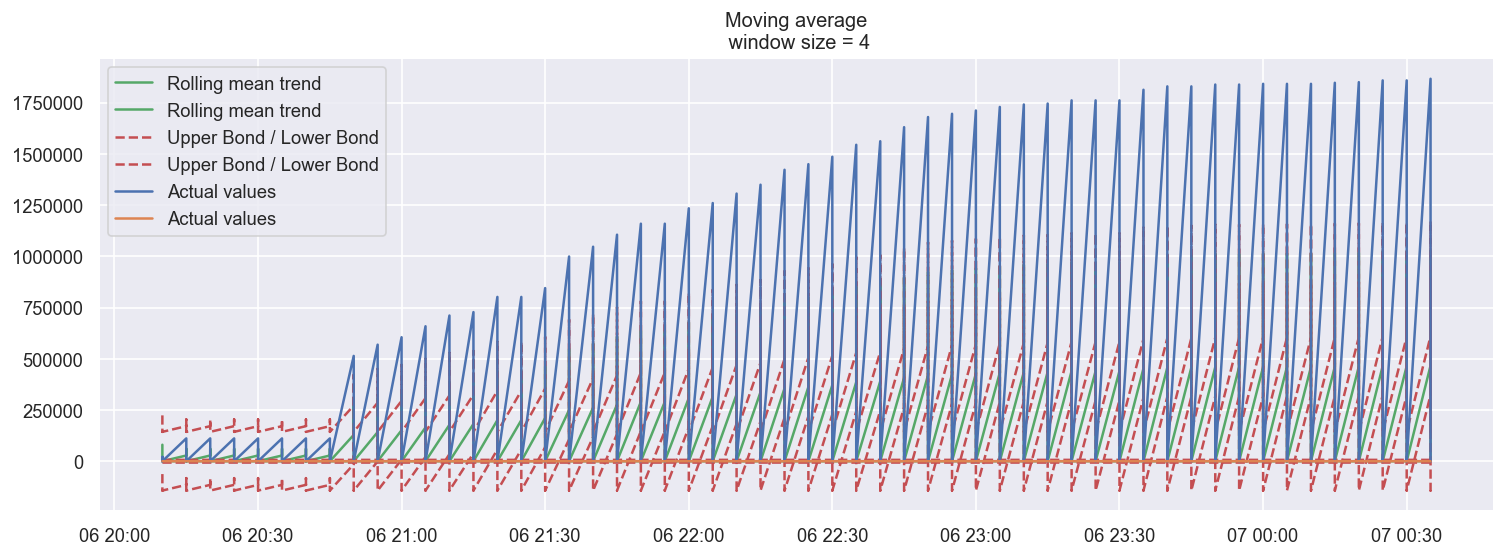

In [42]:
plotMovingAverage(TZ, 4, plot_intervals=True)

In [43]:
TZ_anomaly = TZ.copy()
TZ_anomaly.iloc[-20] = TZ_anomaly.iloc[-20] * 0.2 # say we have 80% drop of ads 

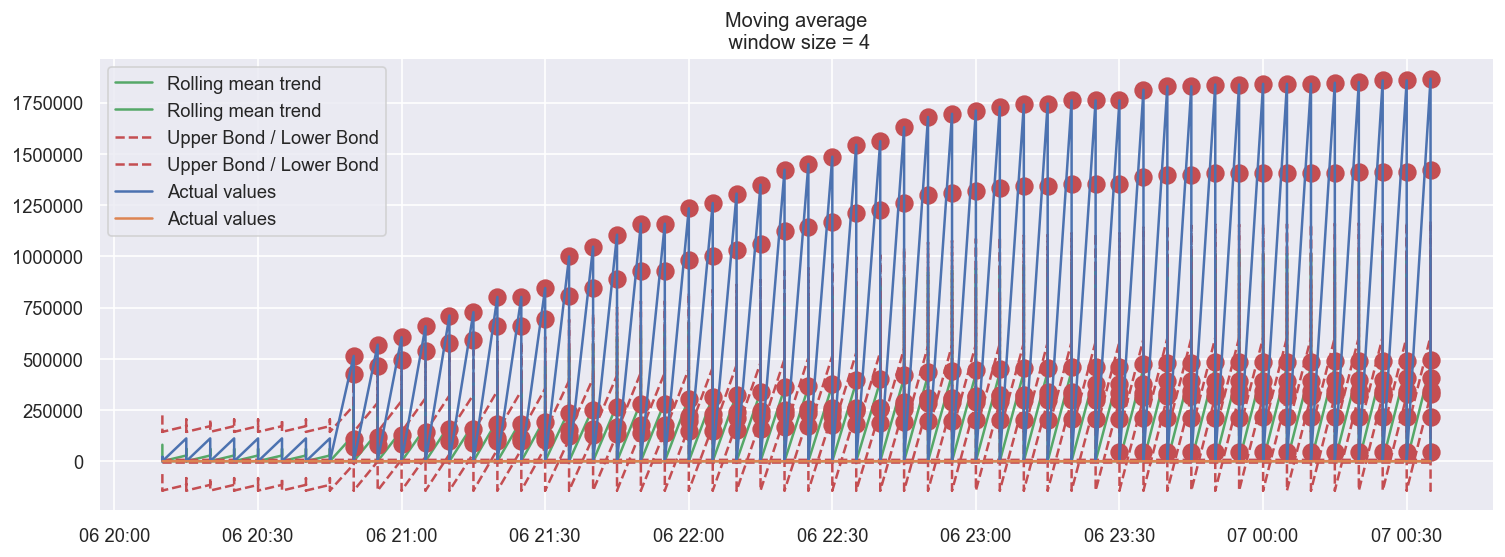

In [44]:
plotMovingAverage(TZ_anomaly, 4, plot_intervals=True, plot_anomalies=True)

# Weighted average is a simple modification to the moving average. The weights sum up to 1 with larger weights assigned to more recent observations.

In [45]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result = result + series.iloc[-n-1] * weights[n]
    return (result)

In [46]:
weighted_average(TZ, [0.6, 0.3, 0.1])

Votes    237.1
Month     10.0
Name: 2019-10-07 00:35:01, dtype: float64

In [47]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
def plotExponentialSmoothing(series, alphas):
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

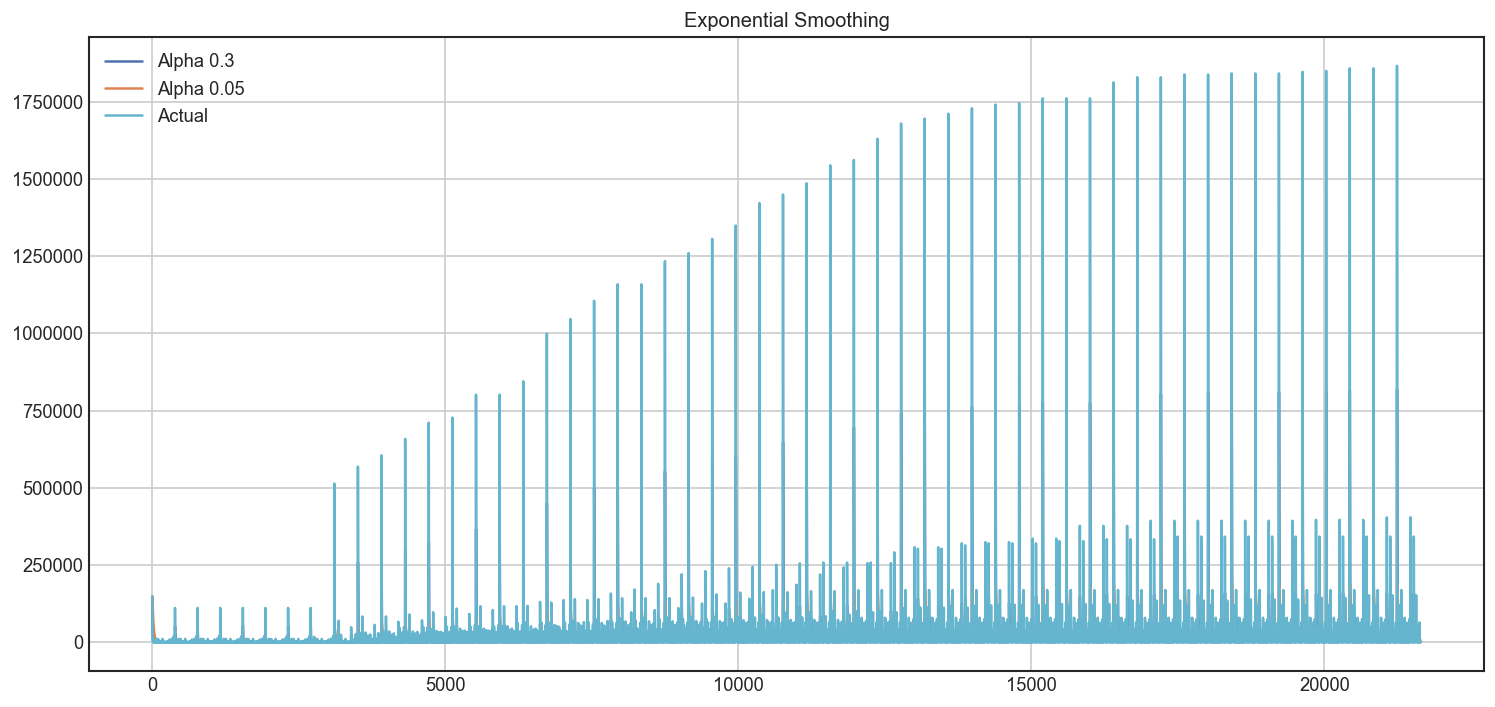

In [48]:
plotExponentialSmoothing(TZ.Votes, [0.3, 0.05])

In [49]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

def plotDoubleExponentialSmoothing(series, alphas, betas):
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

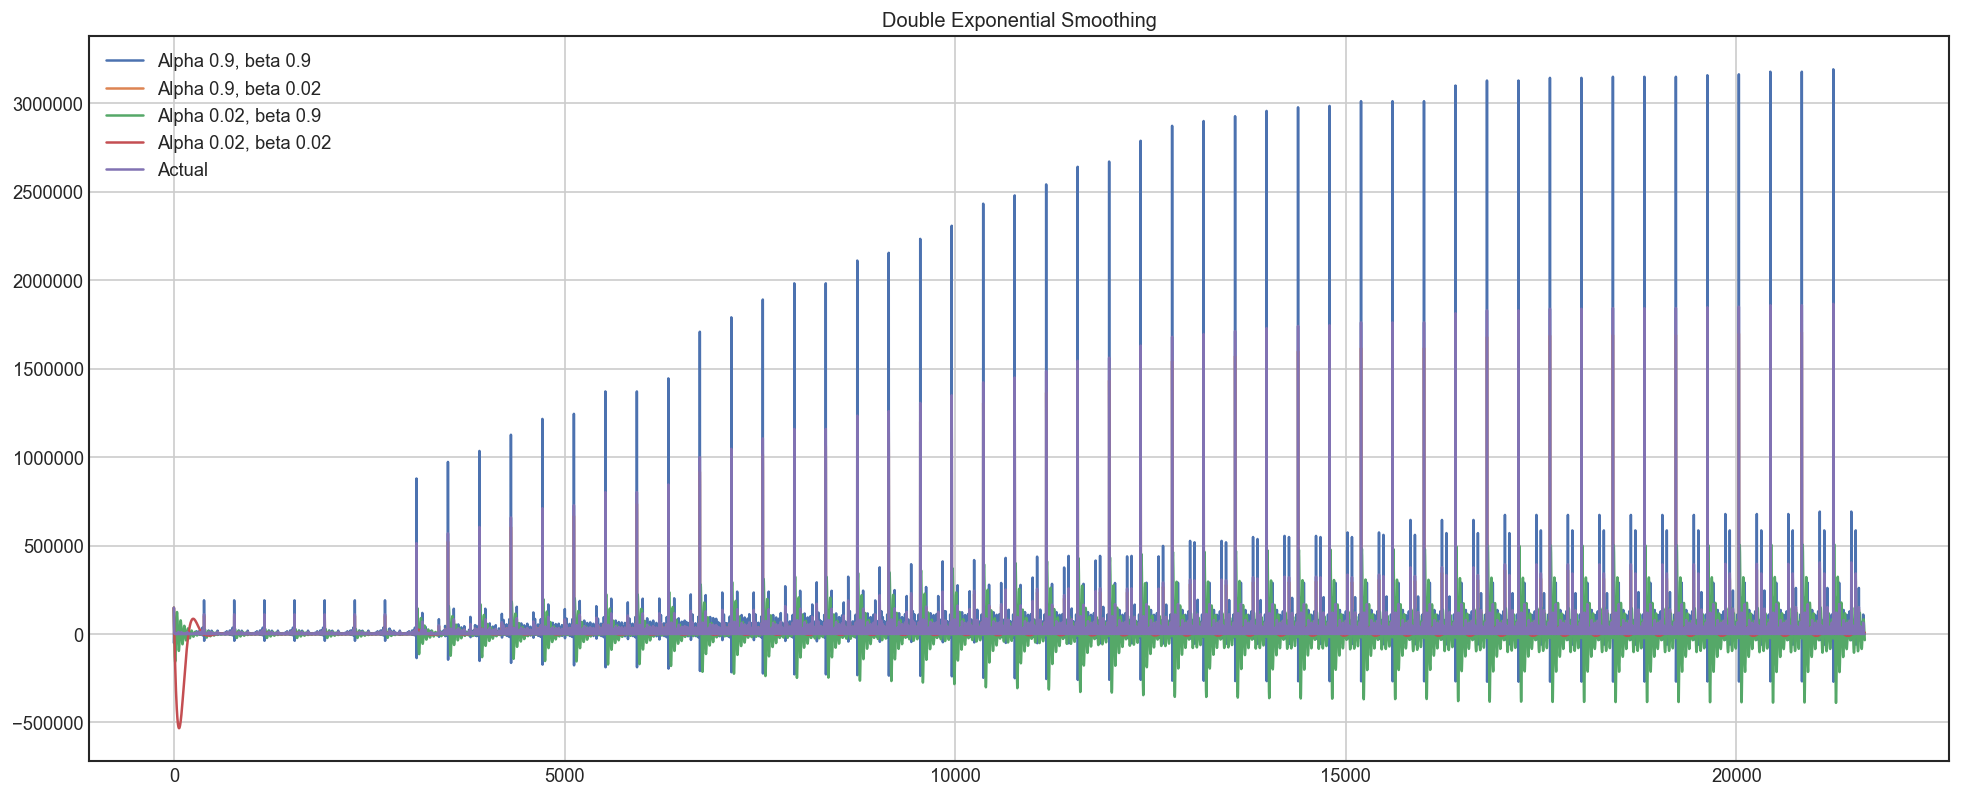

In [50]:
plotDoubleExponentialSmoothing(TZ.Votes, alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [51]:

class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [52]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [53]:
data = TZ.Votes[:-20] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_error), 
               method="TNC", bounds = ((-1, 1), (-1, 1), (-1, 1))
              )

# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 50, scaling_factor = 3)
model.triple_exponential_smoothing()

0.0015365920917180366 0.0011042544351524736 -7.143455622753729e-06


In [54]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

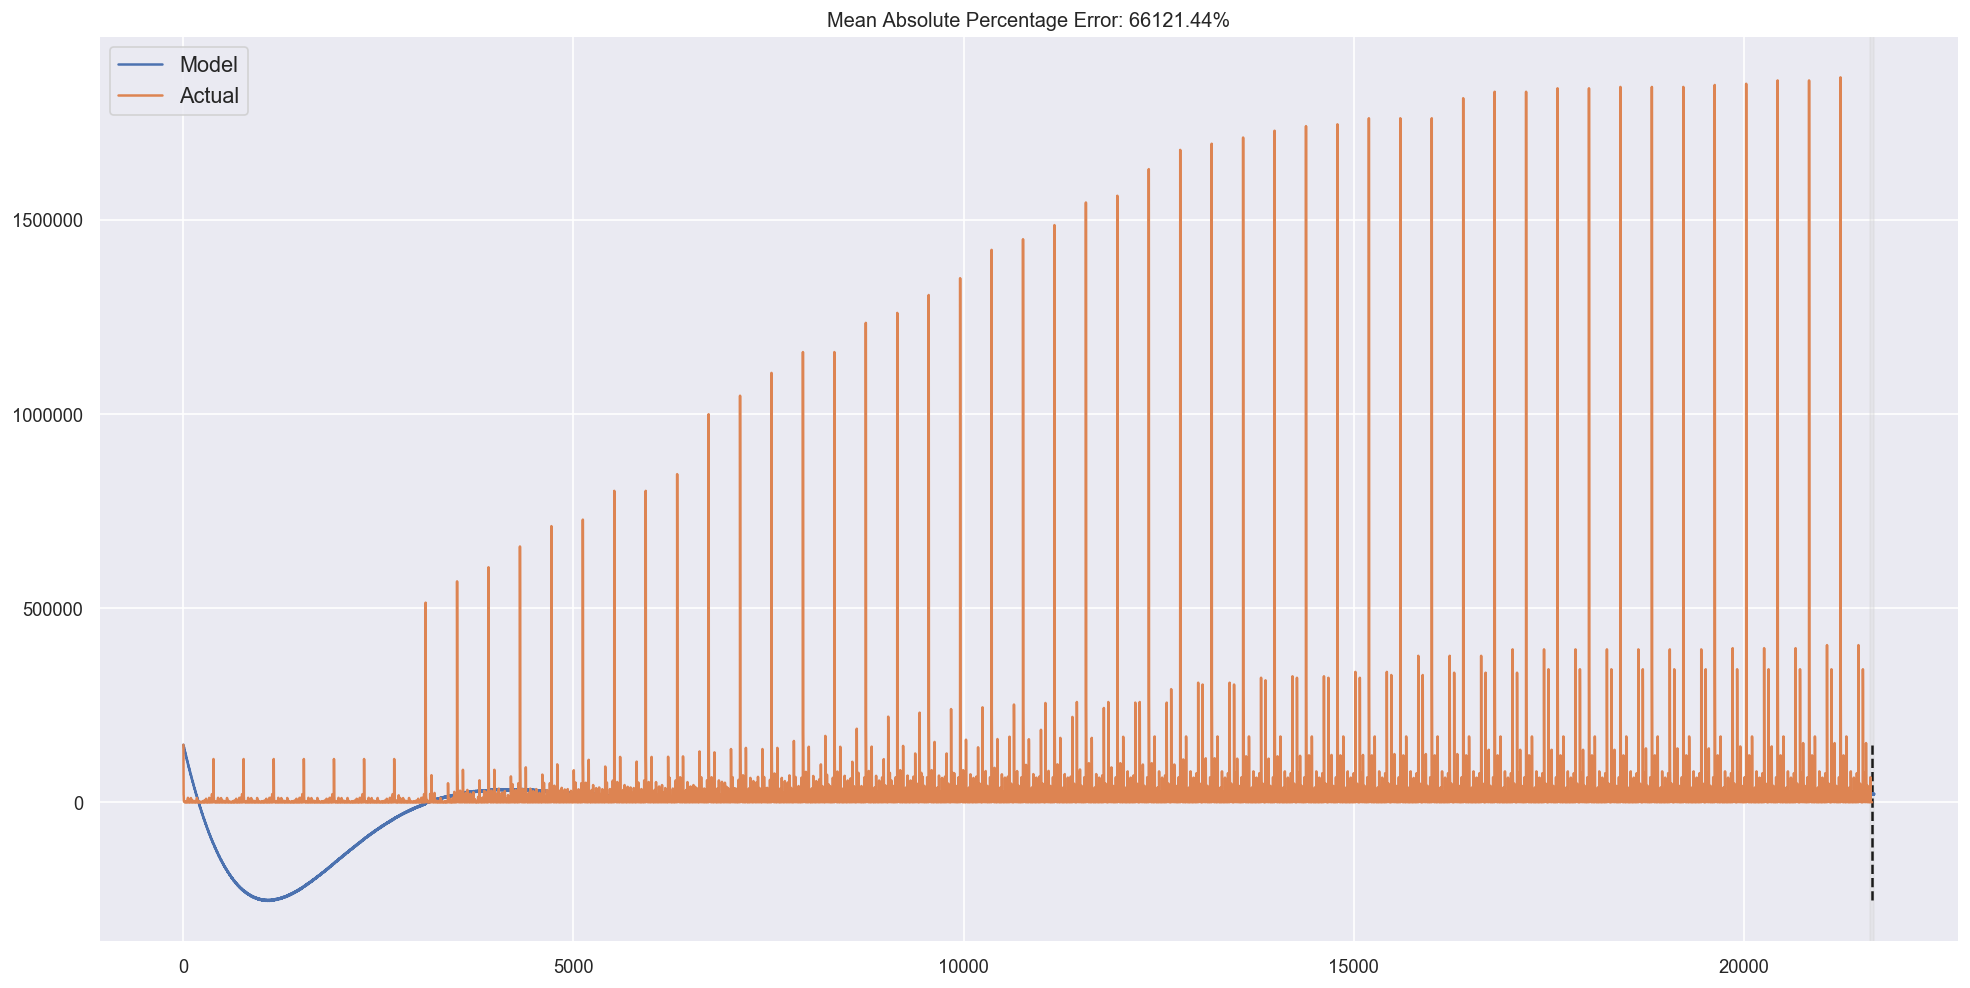

In [55]:
plotHoltWinters(TZ.Votes)

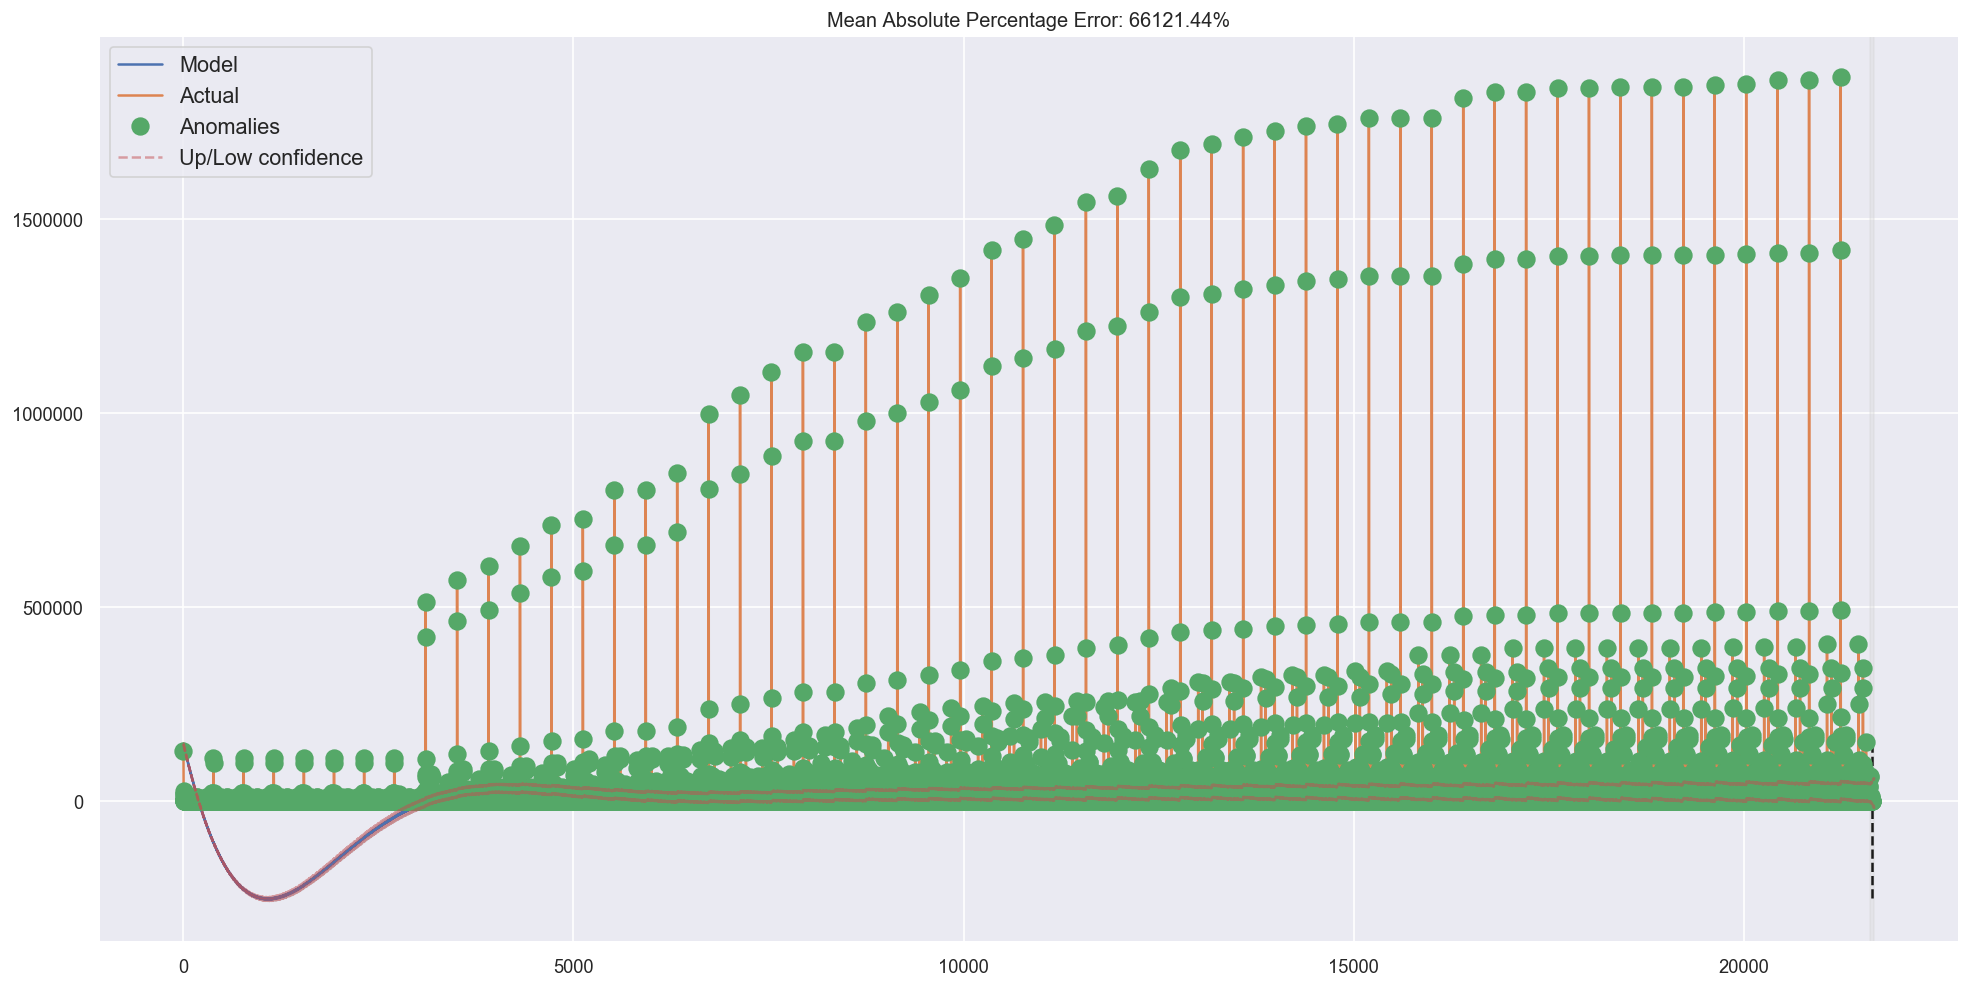

In [56]:
plotHoltWinters(TZ.Votes, plot_intervals=True, plot_anomalies=True)

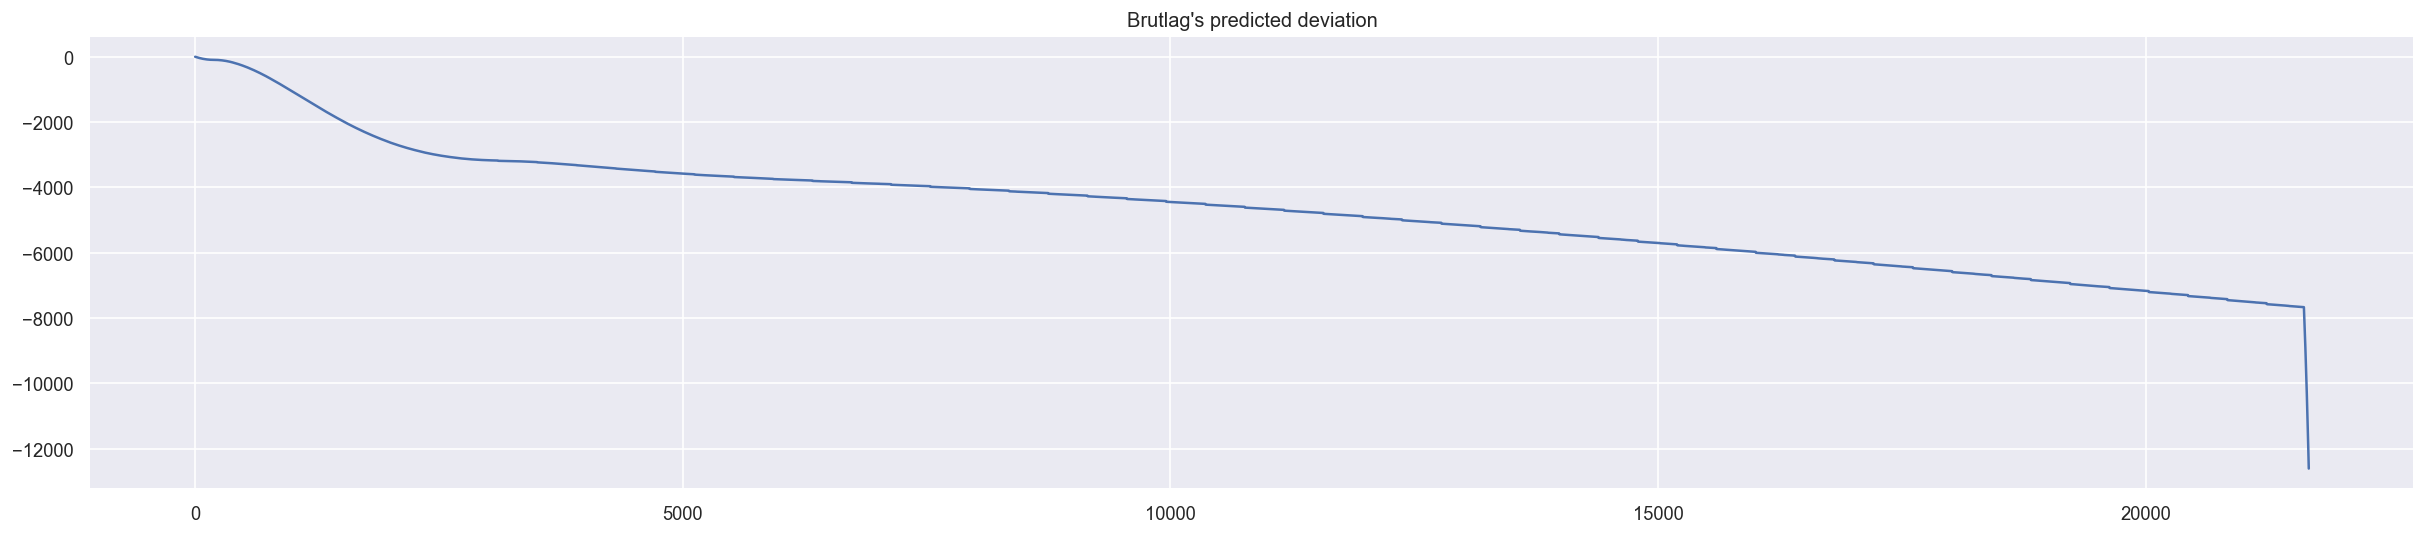

In [57]:
plt.figure(figsize=(25, 5))
plt.plot(model.PredictedDeviation)
plt.grid(True)
plt.axis('tight')
plt.title("Brutlag's predicted deviation");

In [58]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

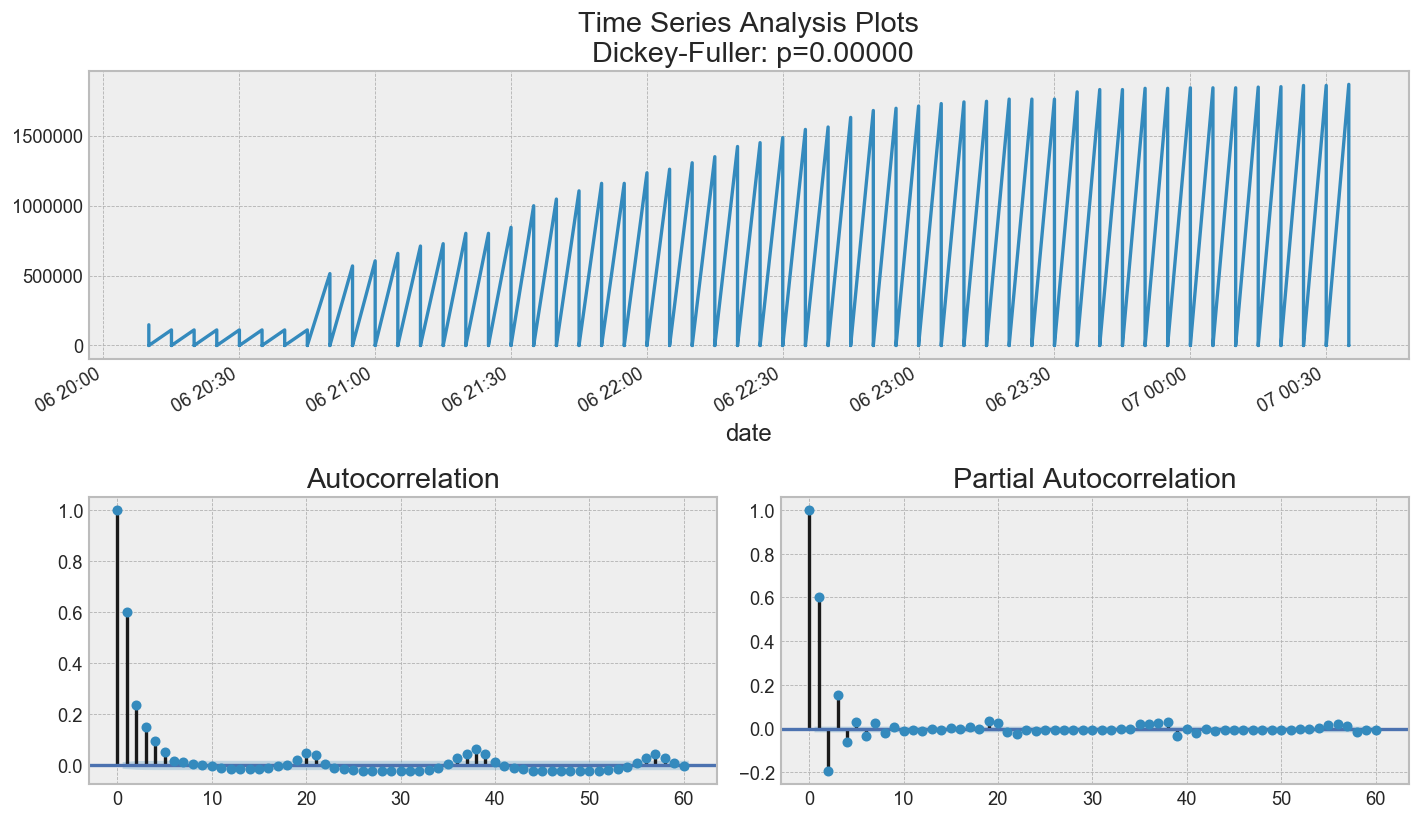

In [59]:
tsplot(TZ.Votes, lags=60)

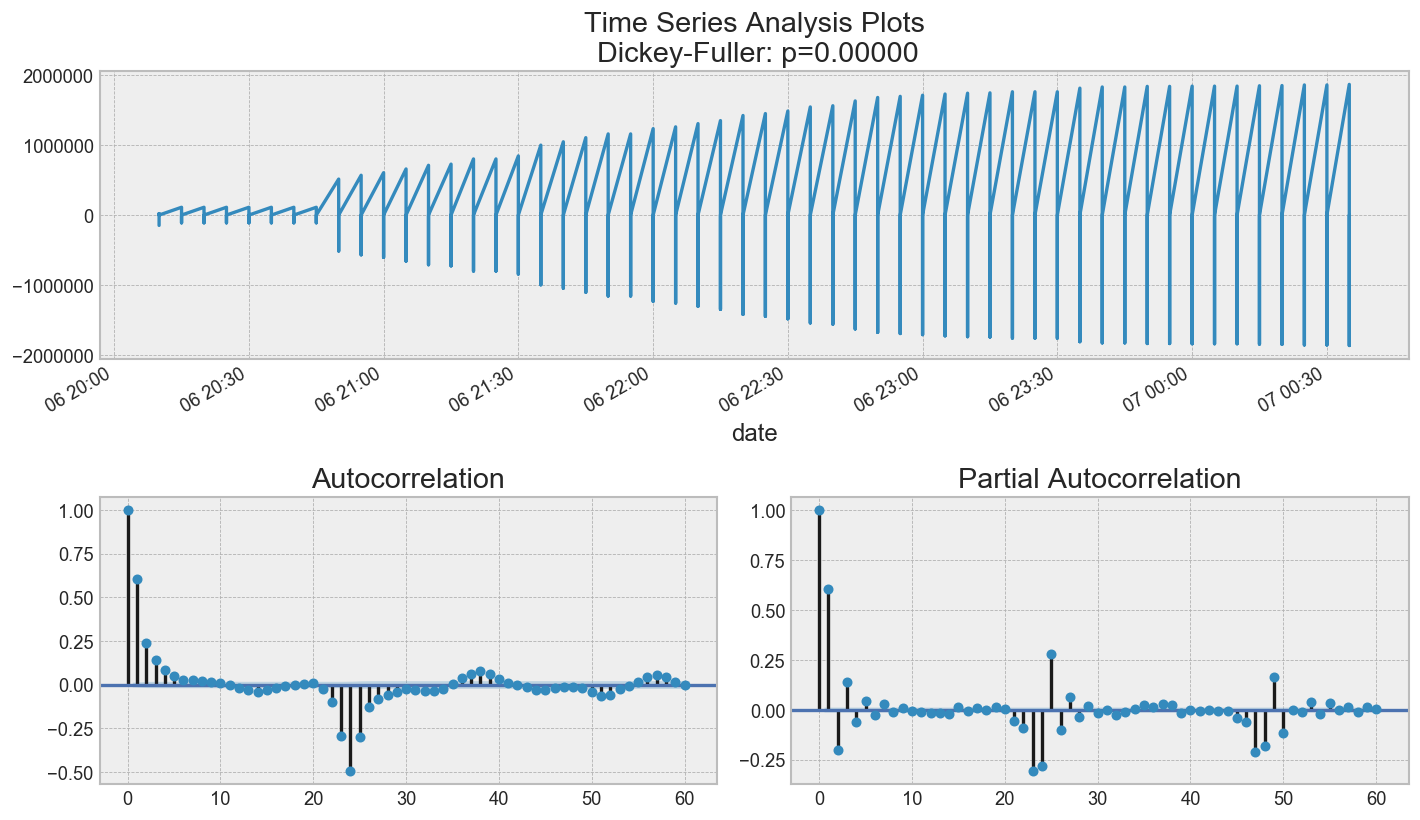

In [60]:
TZ_diff = TZ.Votes - TZ.Votes.shift(24)
tsplot(TZ_diff[24:], lags=60)

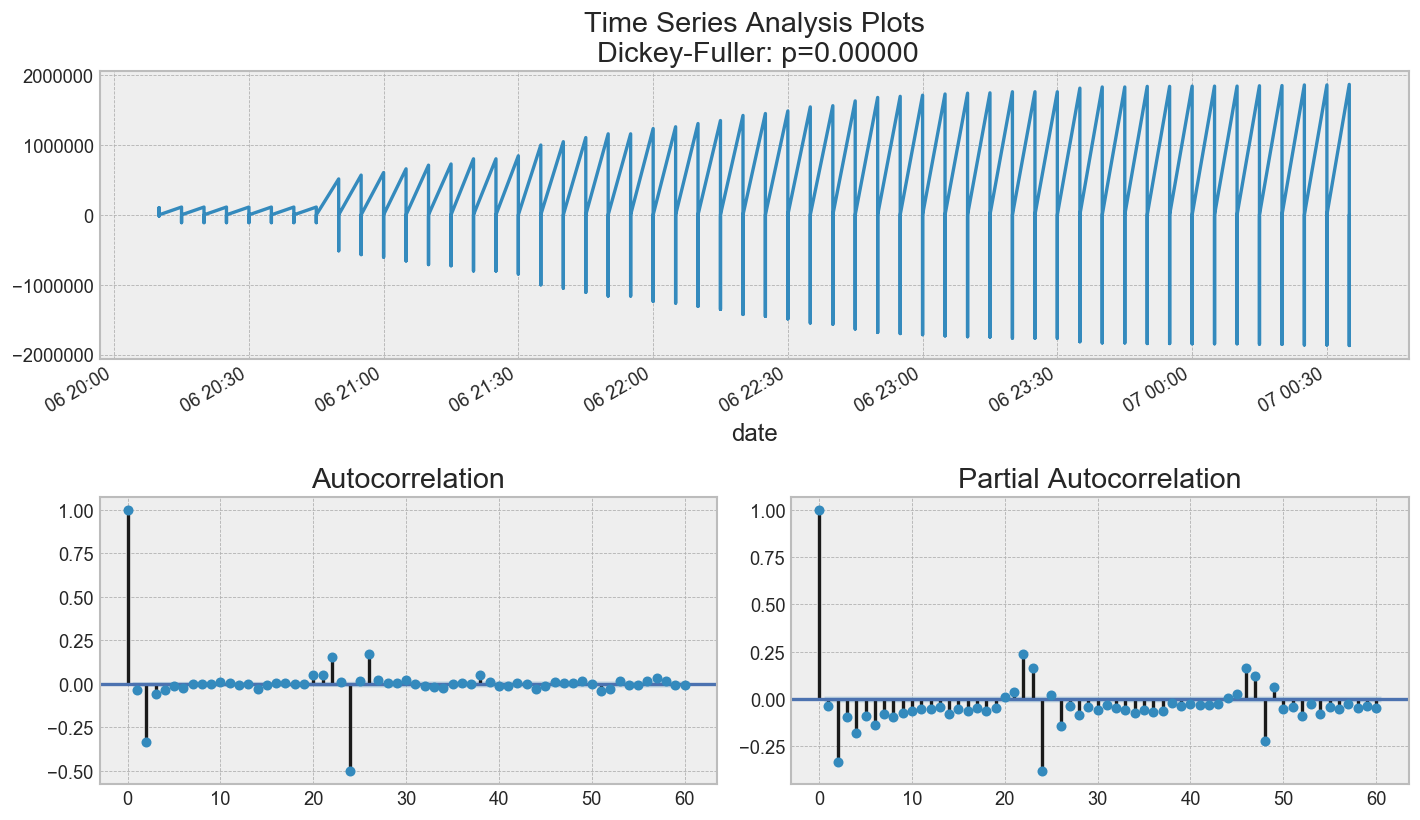

In [61]:
TZ_diff = TZ_diff - TZ_diff.shift(1)
tsplot(TZ_diff[24+1:], lags=60)

In [62]:
# Creating a copy of the initial datagrame to make various transformations 
data = pd.DataFrame(TZ.Votes.copy())
data.columns = ["y"]
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    data["lag_{}".format(i)] = data.y.shift(i)
# take a look at the new dataframe 
data.tail(7)


y   lag_6   lag_7   lag_8   lag_9   lag_10   lag_11  \
date                                                                         
2019-10-07 00:35:01  356  1336.0  1721.0  3778.0  4082.0  10462.0  13956.0   
2019-10-07 00:35:01  363  1215.0  1336.0  1721.0  3778.0   4082.0  10462.0   
2019-10-07 00:35:01  332   974.0  1215.0  1336.0  1721.0   3778.0   4082.0   
2019-10-07 00:35:01  326   900.0   974.0  1215.0  1336.0   1721.0   3778.0   
2019-10-07 00:35:01  256   875.0   900.0   974.0  1215.0   1336.0   1721.0   
2019-10-07 00:35:01  239   457.0   875.0   900.0   974.0   1215.0   1336.0   
2019-10-07 00:35:01  118   356.0   457.0   875.0   900.0    974.0   1215.0   

                      lag_12   lag_13   lag_14   lag_15   lag_16   lag_17  \
date                                                                        
2019-10-07 00:35:01  62833.0  64373.0    162.0    171.0    185.0    188.0   
2019-10-07 00:35:01  13956.0  62833.0  64373.0    162.0    171.0    185.0   
2019-10-07 00:35:01  10462.0  13956.0  62833.0  64373.0    162.0    171.0   
2019-10-07 00:35:01   4082.0  10462.0  13956.0  62833.0  64373.0    162.0   
2019-10-07 00:35:01   3778.0   4082.0  10462.0  13956.0  62833.0  64373.0   
2019-10-07 00:35:01   1721.0   3778.0   4082.0  10462.0  13956.0  62833.0   
2019-10-07 00:35:01   1336.0   1721.0   3778.0   4082.0  10462.0  13956.0   

                      lag_18   lag_19  lag_20  lag_21  lag_22  lag_23  lag_24  
date                                                                           
2019-10-07 00:35:01    425.0    549.0   579.0   648.0   700.0   791.0  1651.0  
2019-10-07 00:35:01    188.0    425.0   549.0   579.0   648.0   700.0   791.0  
2019-10-07 00:35:01    185.0    188.0   425.0   549.0   579.0   648.0   700.0  
2019-10-07 00:35:01    171.0    185.0   188.0   425.0   549.0   579.0   648.0  
2019-10-07 00:35:01    162.0    171.0   185.0   188.0   425.0   549.0   579.0  
2019-10-07 00:35:01  64373.0    162.0   171.0   185.0   188.0   425.0   549.0  
2019-10-07 00:35:01  62833.0  64373.0   162.0   171.0   185.0   188.0   425.0

In [63]:
# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [64]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [65]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [66]:
# machine learning in two lines
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

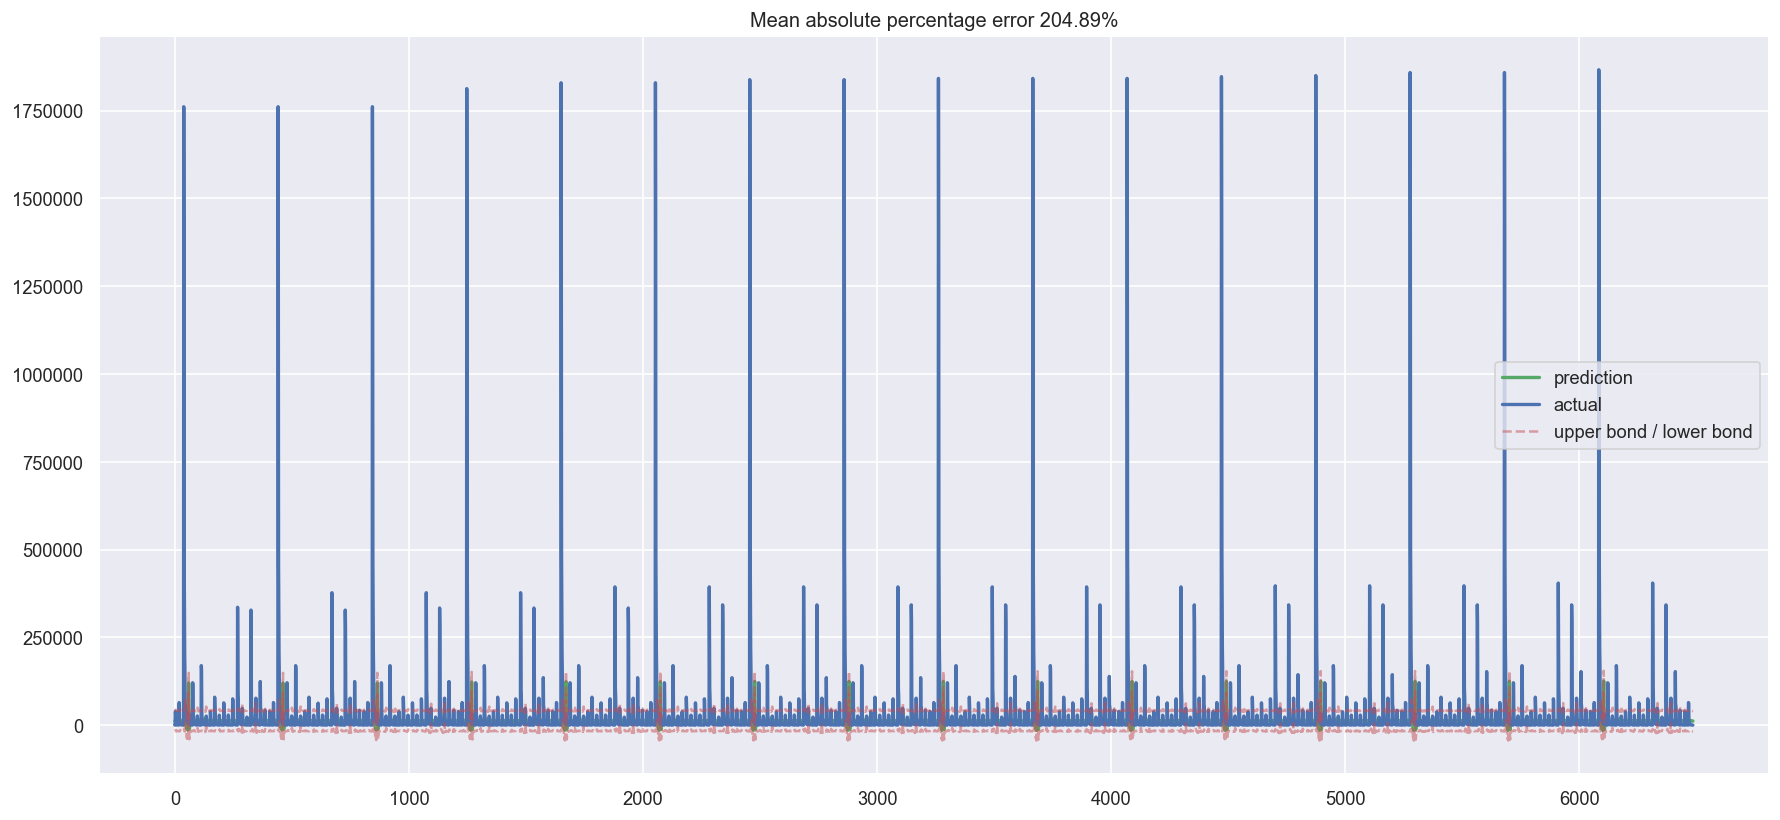

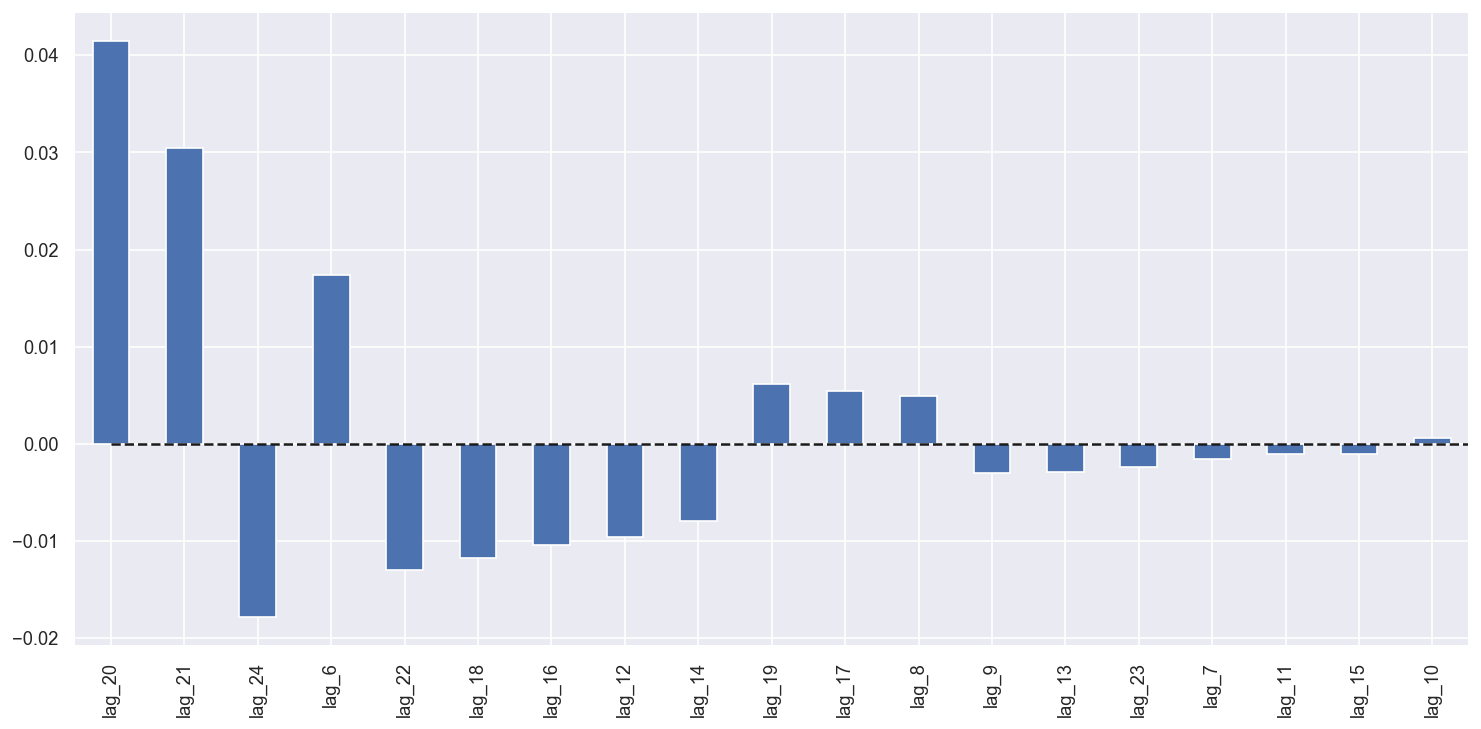

In [68]:
plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

In [69]:
data.index = pd.to_datetime(data.index)
data["hour"] = data.index.hour
data["weekday"] = data.index.weekday
data['is_weekend'] = data.weekday.isin([5,6])*1
data.tail()

y  lag_6   lag_7   lag_8   lag_9  lag_10  lag_11  \
date                                                                      
2019-10-07 00:35:01  332  974.0  1215.0  1336.0  1721.0  3778.0  4082.0   
2019-10-07 00:35:01  326  900.0   974.0  1215.0  1336.0  1721.0  3778.0   
2019-10-07 00:35:01  256  875.0   900.0   974.0  1215.0  1336.0  1721.0   
2019-10-07 00:35:01  239  457.0   875.0   900.0   974.0  1215.0  1336.0   
2019-10-07 00:35:01  118  356.0   457.0   875.0   900.0   974.0  1215.0   

                      lag_12   lag_13   lag_14  ...   lag_18   lag_19  lag_20  \
date                                            ...                             
2019-10-07 00:35:01  10462.0  13956.0  62833.0  ...    185.0    188.0   425.0   
2019-10-07 00:35:01   4082.0  10462.0  13956.0  ...    171.0    185.0   188.0   
2019-10-07 00:35:01   3778.0   4082.0  10462.0  ...    162.0    171.0   185.0   
2019-10-07 00:35:01   1721.0   3778.0   4082.0  ...  64373.0    162.0   171.0   
2019-10-07 00:35:01   1336.0   1721.0   3778.0  ...  62833.0  64373.0   162.0   

                     lag_21  lag_22  lag_23  lag_24  hour  weekday  is_weekend  
date                                                                            
2019-10-07 00:35:01   549.0   579.0   648.0   700.0     0        0           0  
2019-10-07 00:35:01   425.0   549.0   579.0   648.0     0        0           0  
2019-10-07 00:35:01   188.0   425.0   549.0   579.0     0        0           0  
2019-10-07 00:35:01   185.0   188.0   425.0   549.0     0        0           0  
2019-10-07 00:35:01   171.0   185.0   188.0   425.0     0        0           0  

[5 rows x 23 columns]

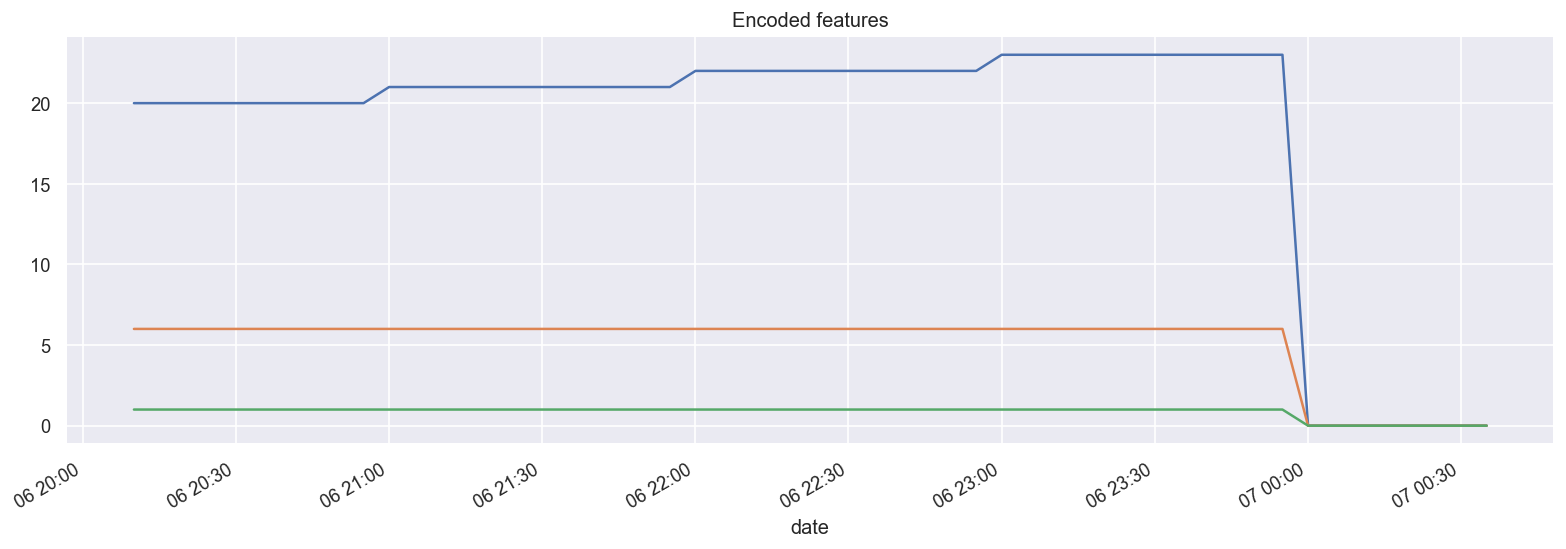

In [70]:
plt.figure(figsize=(16, 5))
plt.title("Encoded features")
data.hour.plot()
data.weekday.plot()
data.is_weekend.plot()
plt.grid(True);

In [71]:
scaler = StandardScaler()

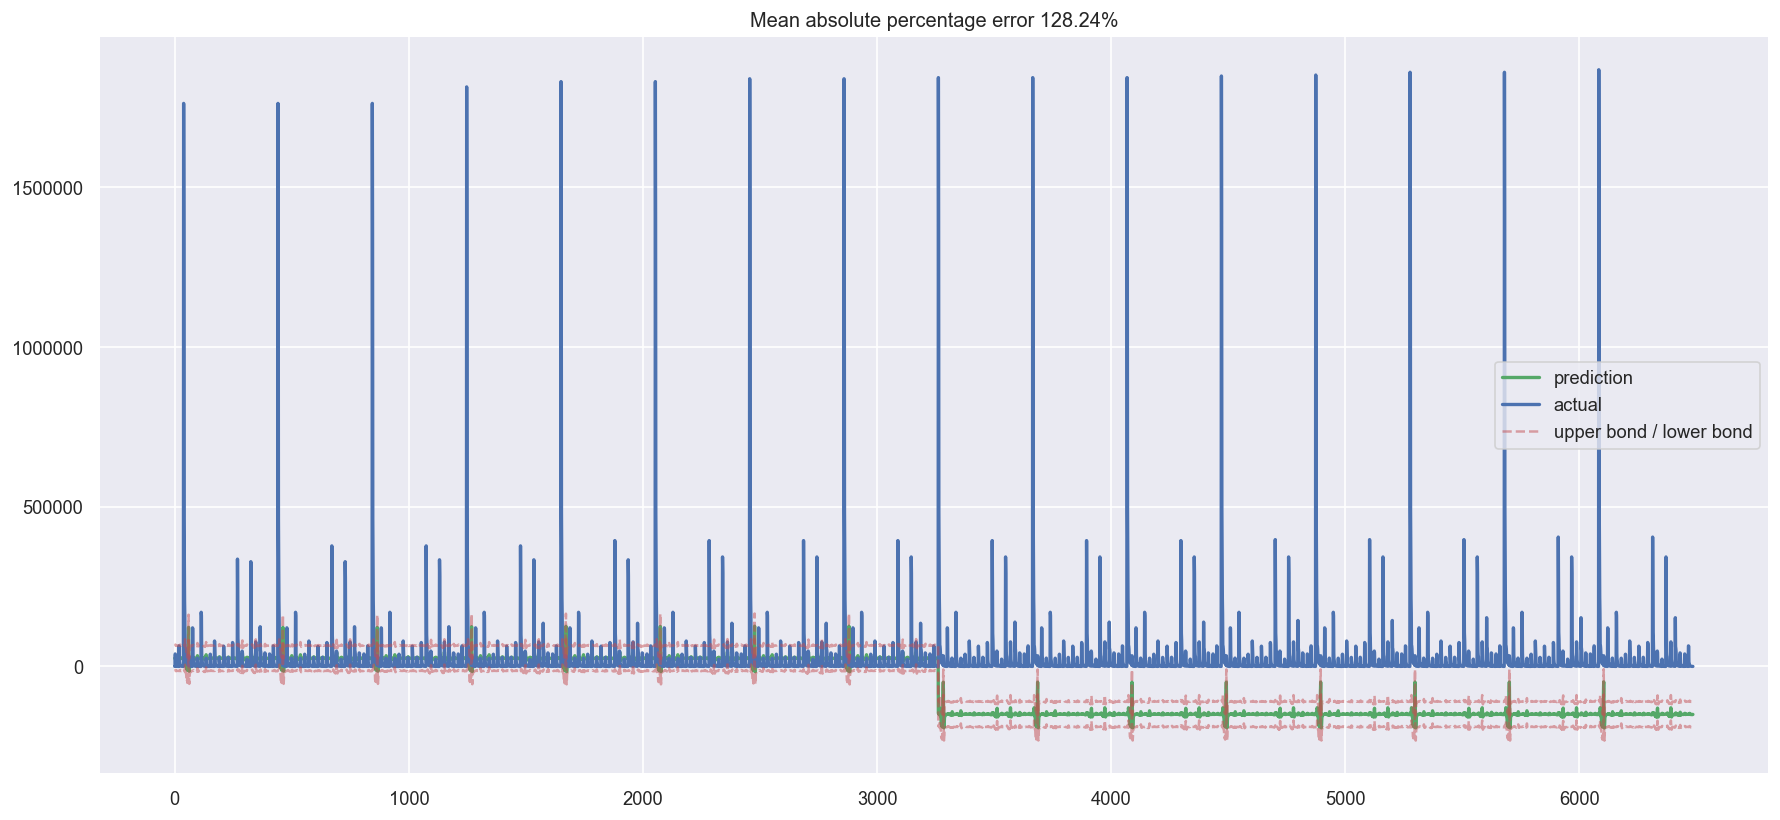

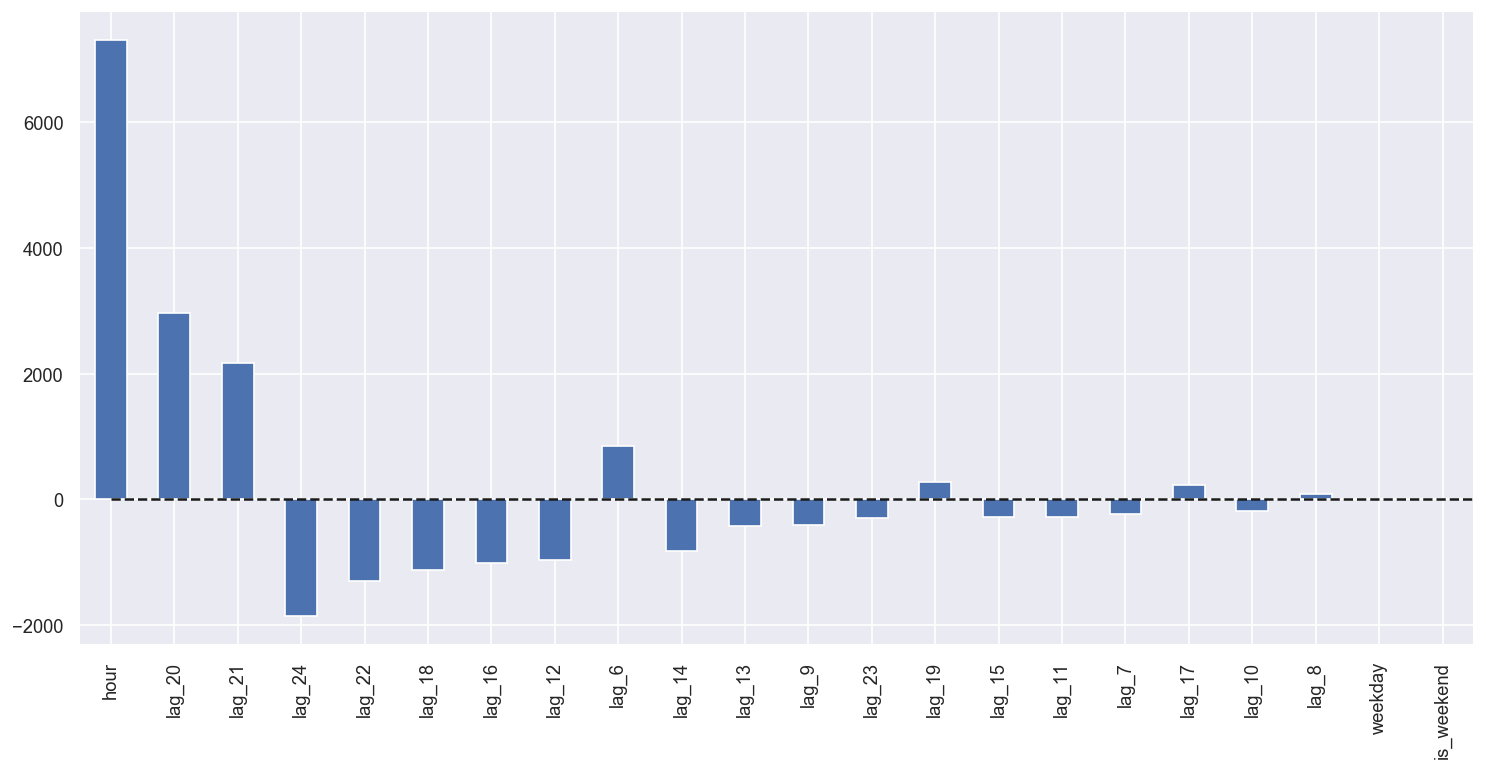

In [72]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

In [73]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

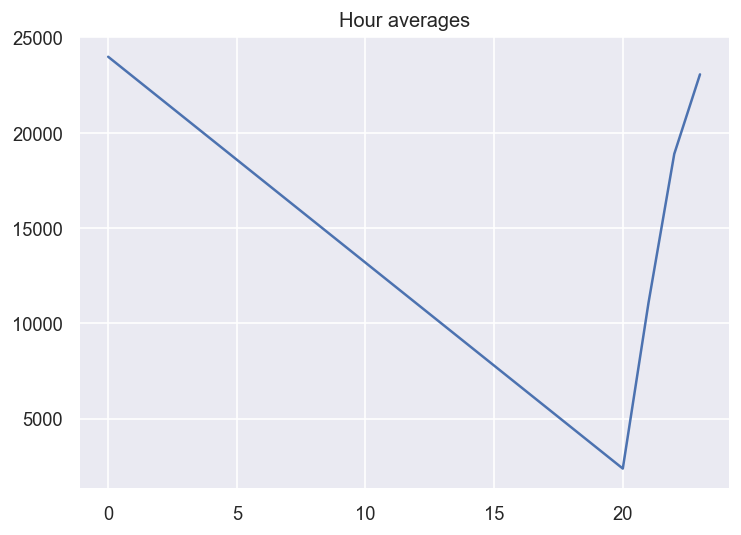

In [74]:
average_hour = code_mean(data, 'hour', "y")
plt.figure(figsize=(7, 5))
plt.title("Hour averages")
pd.DataFrame.from_dict(average_hour, orient='index')[0].plot()
plt.grid(True);

In [75]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
    """
        series: pd.DataFrame
            dataframe with timeseries

        lag_start: int
            initial step back in time to slice target variable 
            example - lag_start = 1 means that the model 
                      will see yesterday's values to predict today

        lag_end: int
            final step back in time to slice target variable
            example - lag_end = 4 means that the model 
                      will see up to 4 days back in time to predict today

        test_size: float
            size of the test dataset after train/test split as percentage of dataset

        target_encoding: boolean
            if True - add target averages to the dataset
        
    """
    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "y").get, data.hour))

        # frop encoded variables 
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

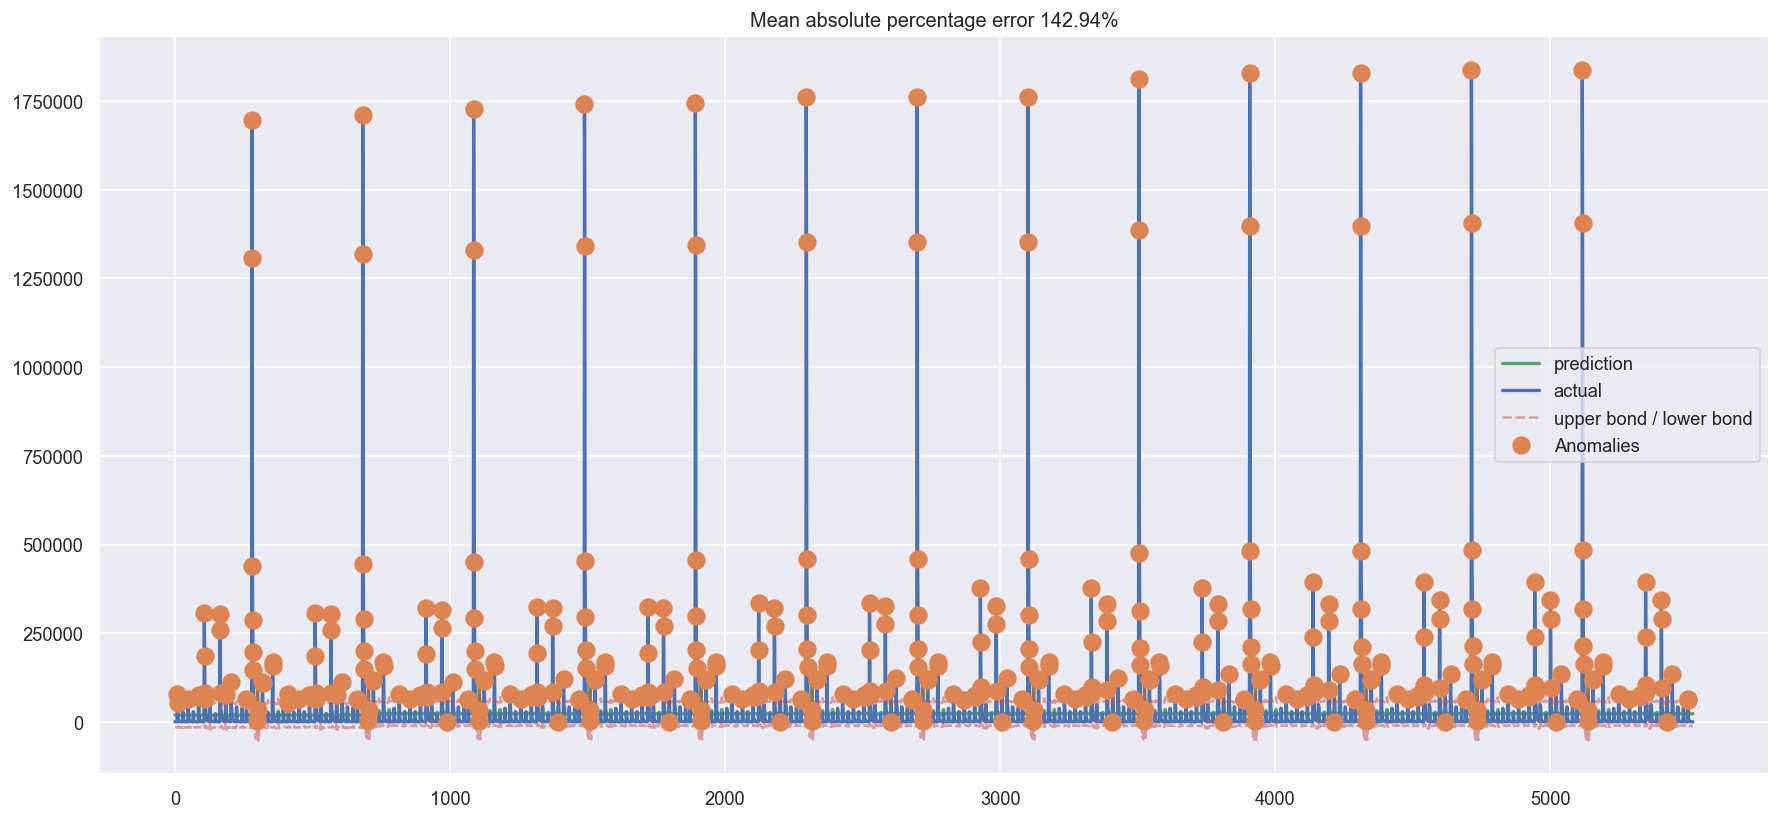

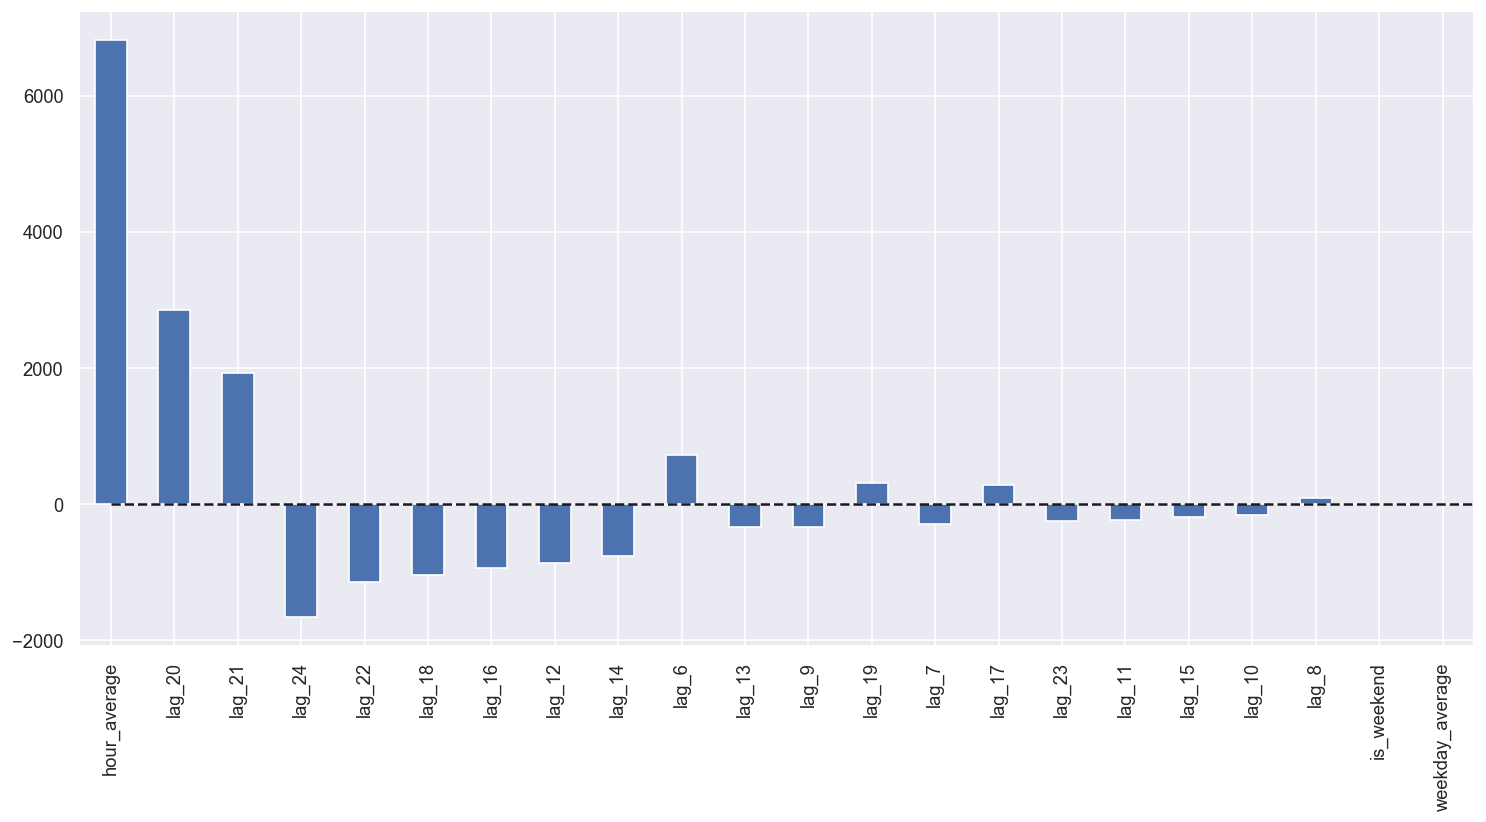

In [76]:
X_train, X_test, y_train, y_test = prepareData(TZ.Votes, lag_start=6, lag_end=25, test_size=0.3, target_encoding=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

In [77]:
X_train, X_test, y_train, y_test =prepareData(TZ.Votes, lag_start=6, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

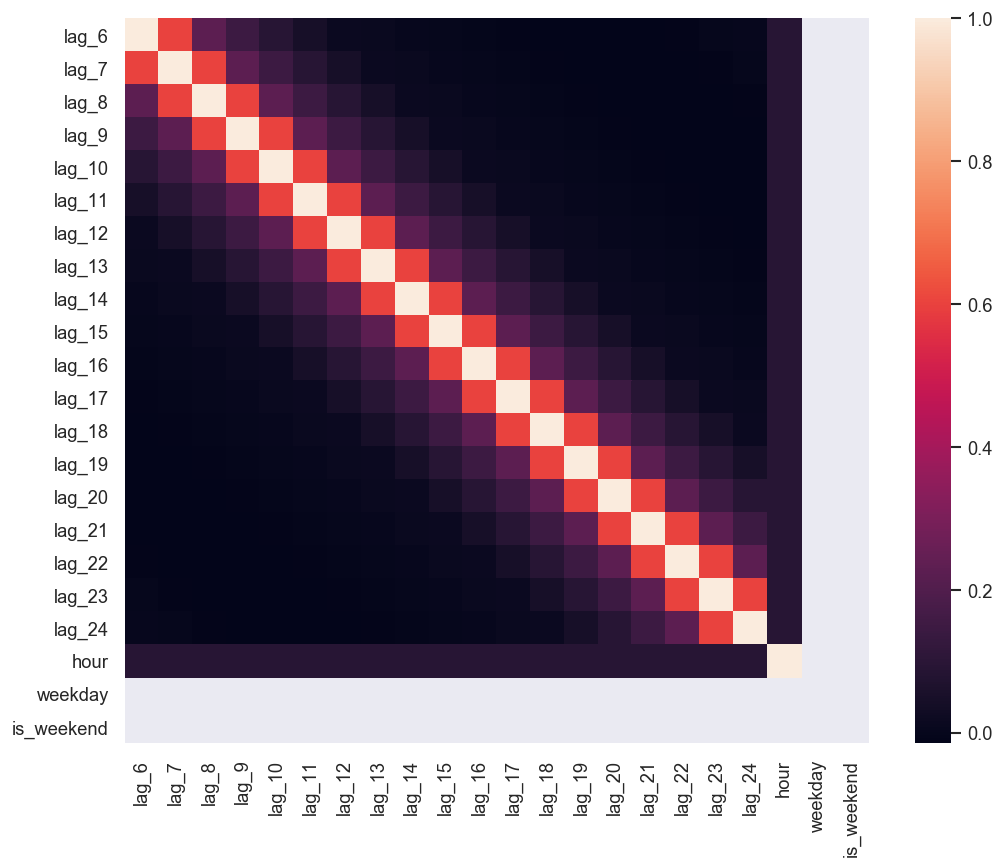

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

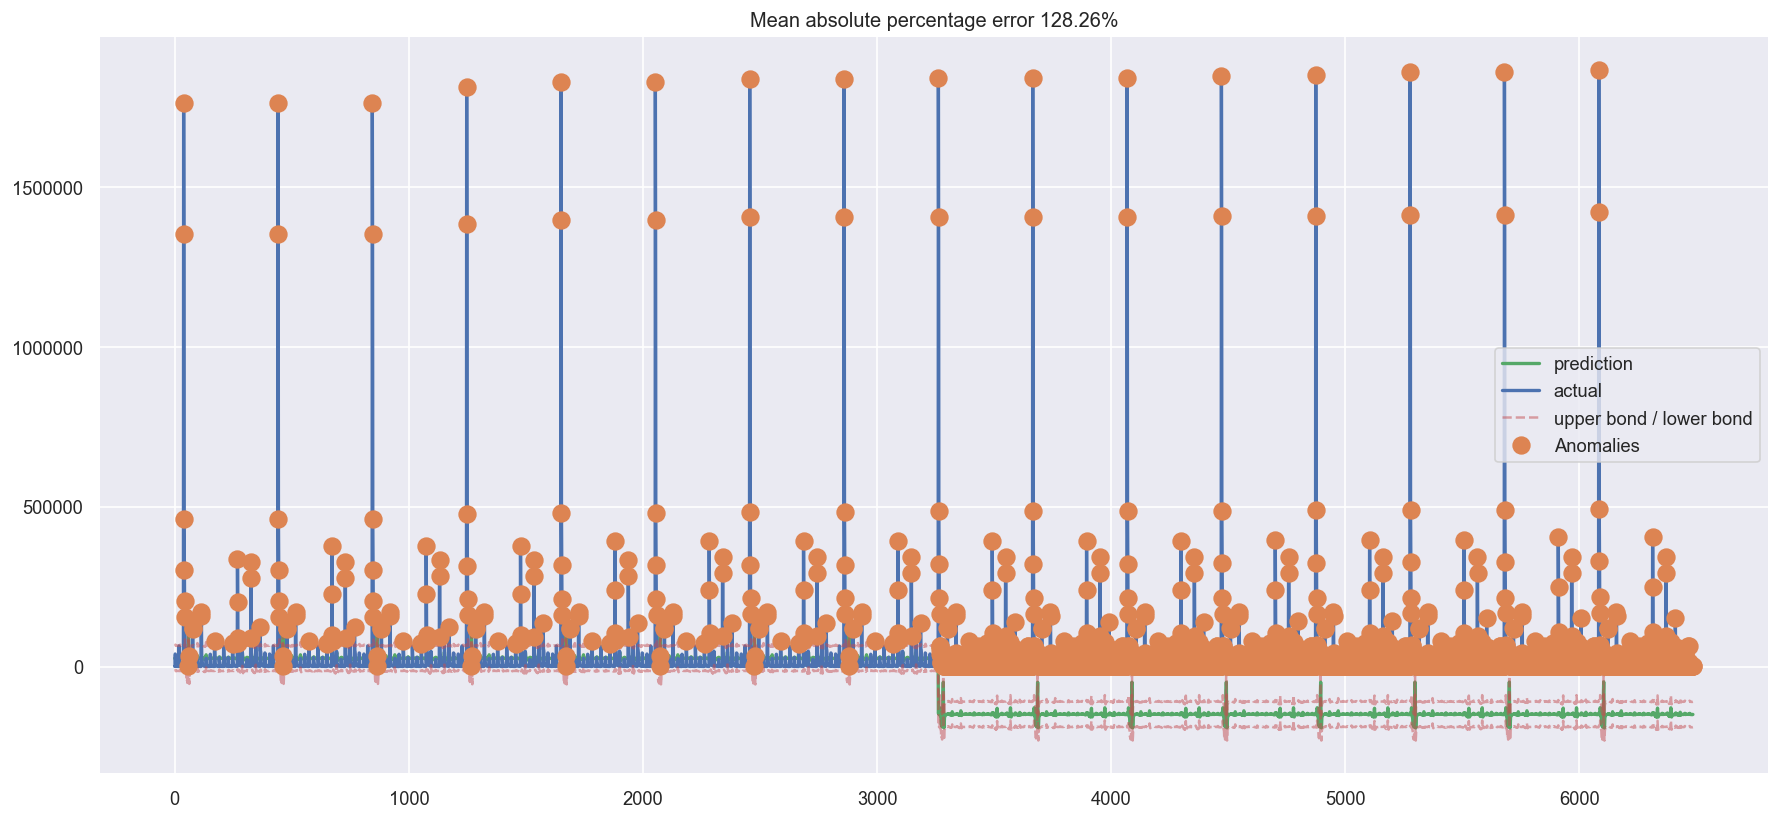

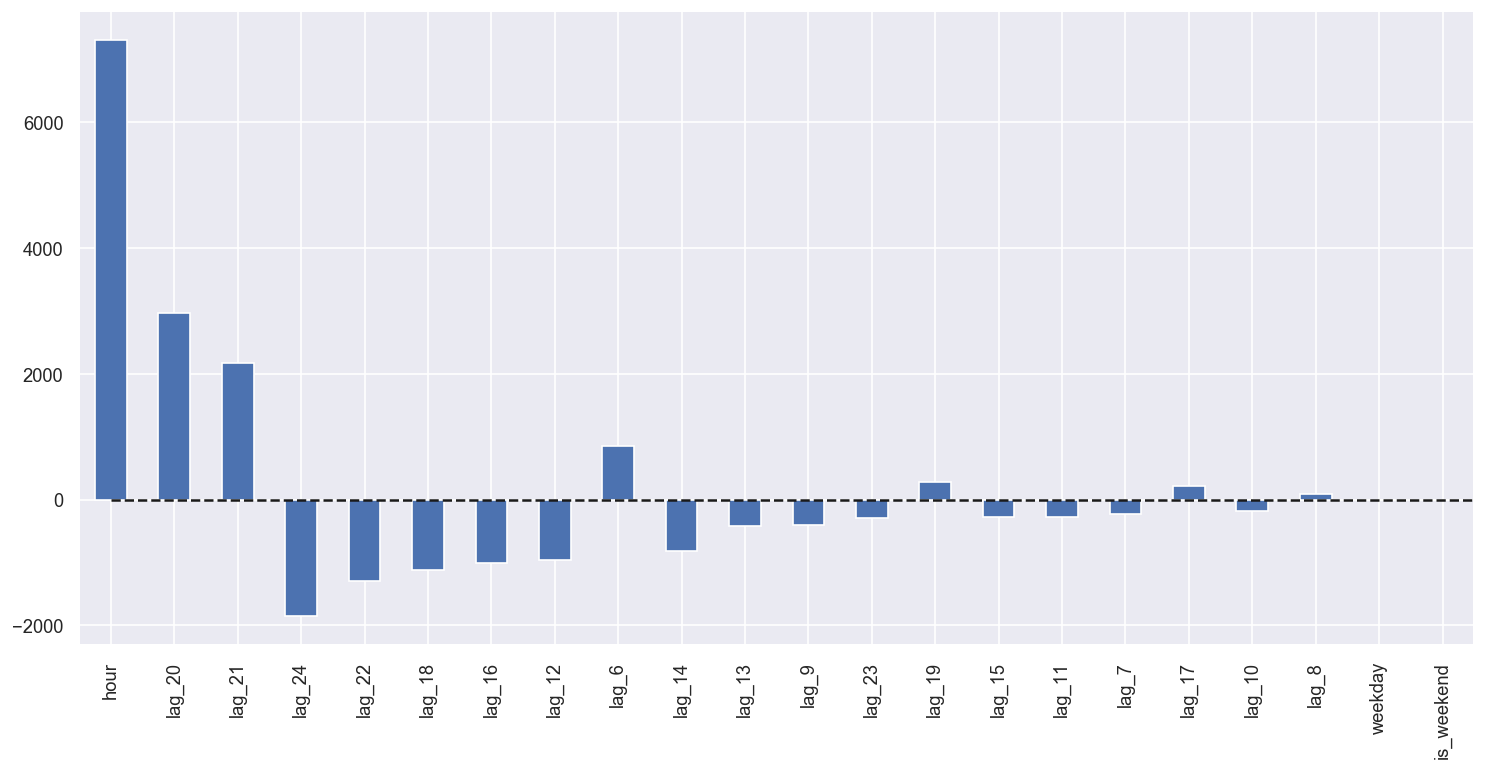

In [79]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

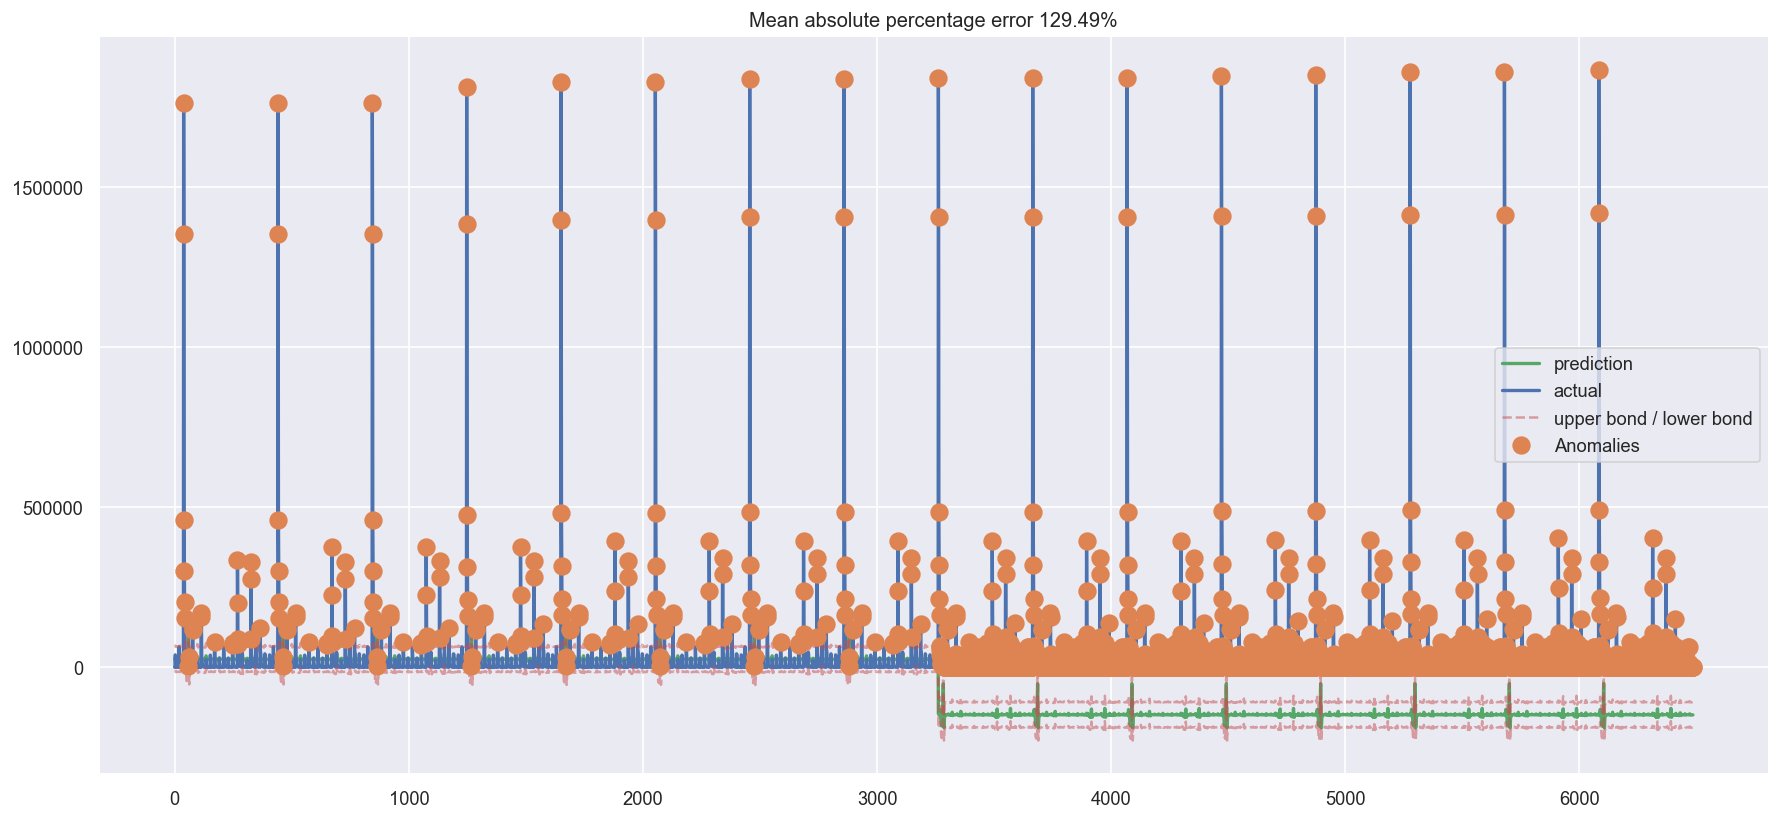

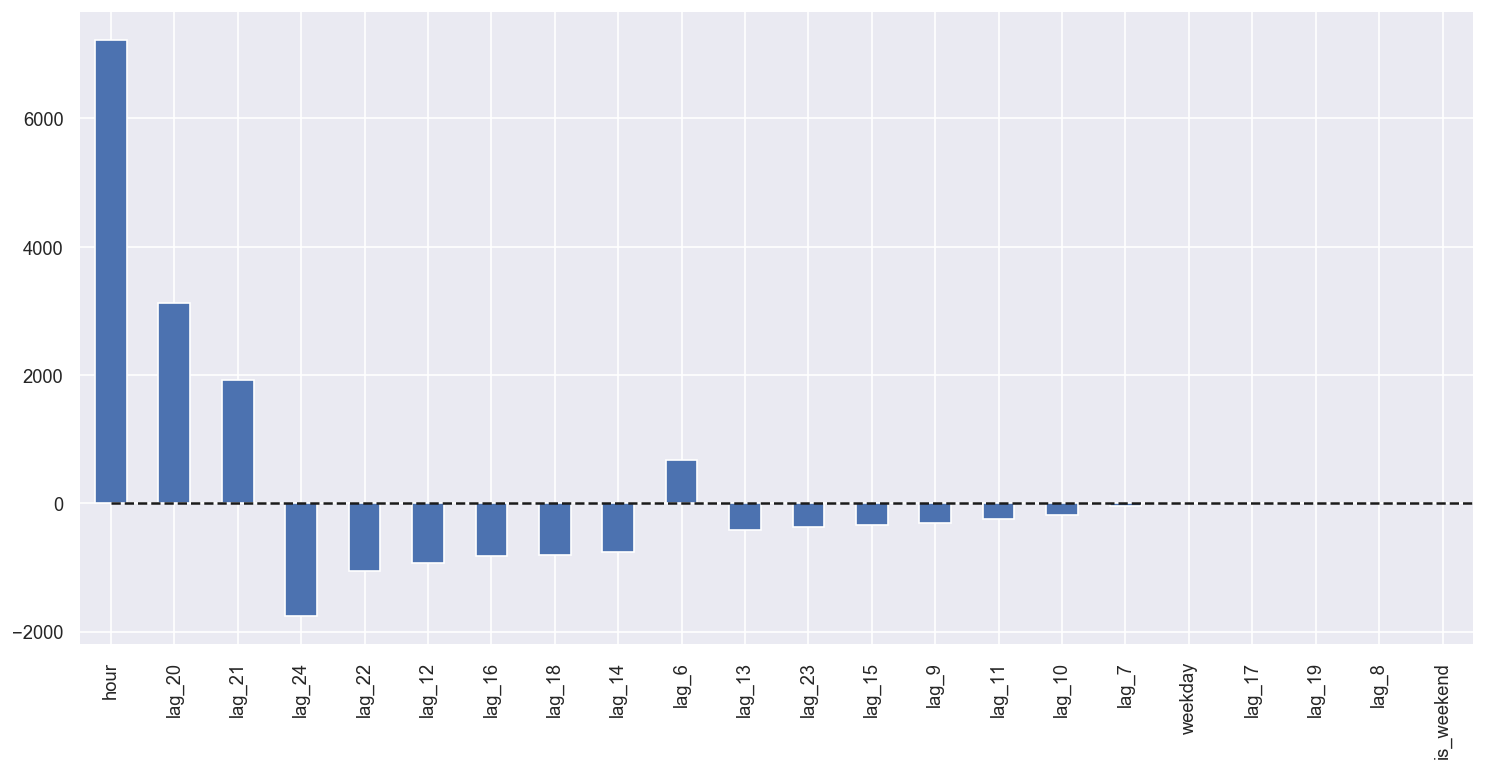

In [80]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

In [81]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

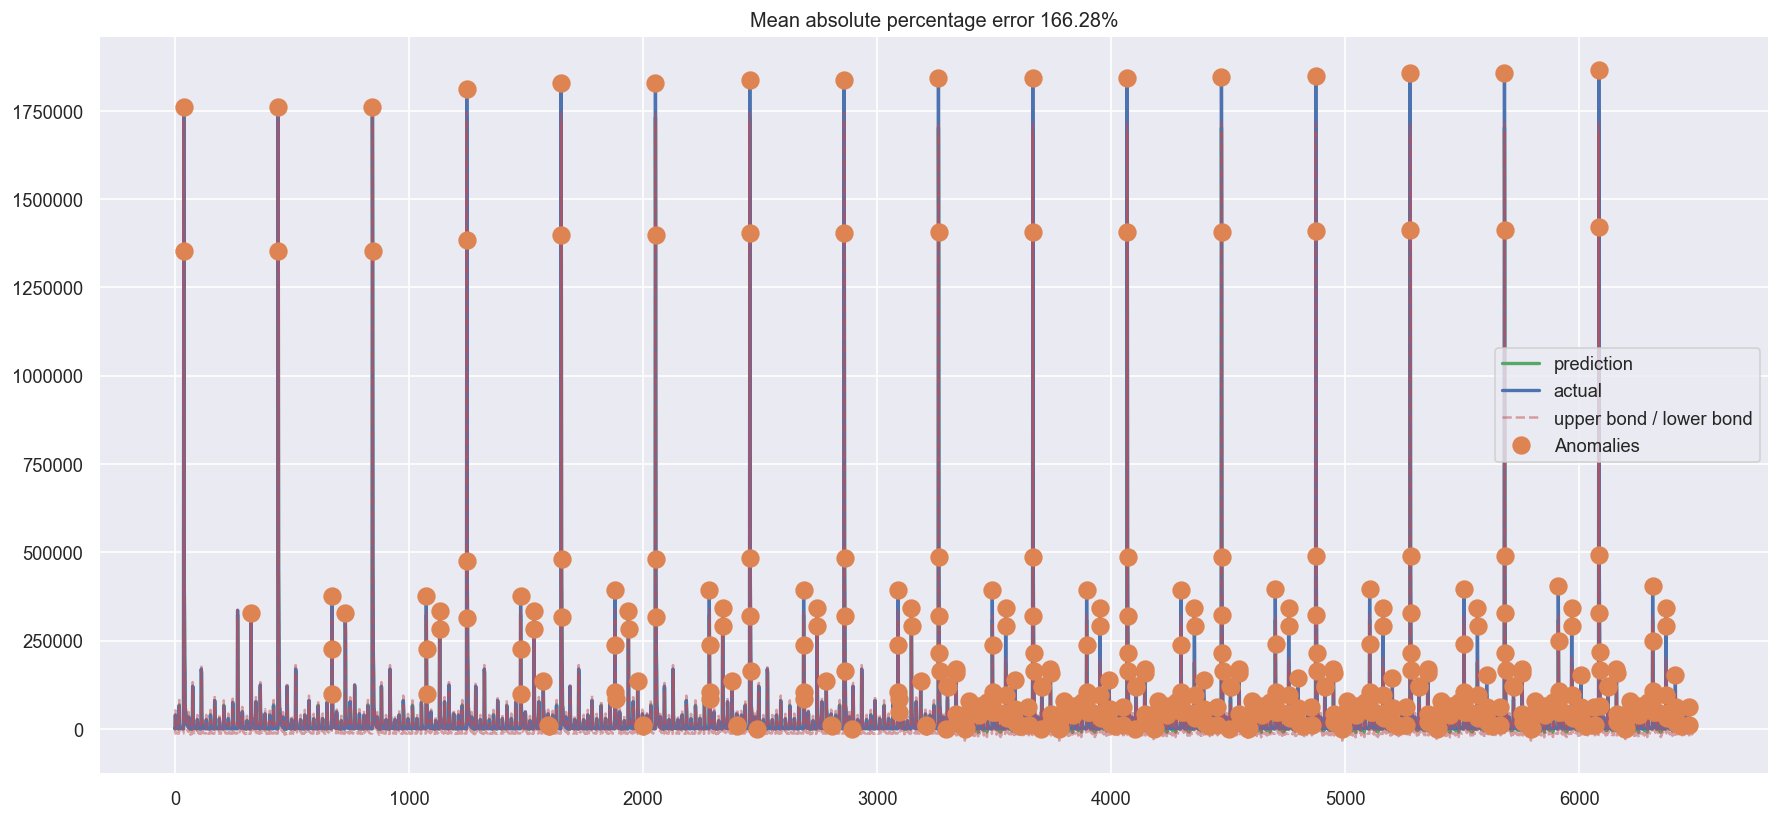

In [82]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python